## Data Import

In [2]:
## Dataset Import
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy
import statsmodels
import sklearn
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score,cross_val_predict,StratifiedKFold,RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeRegressor

In [3]:
train = pd.read_csv('C:/Users/User/Desktop/Kaggle - Mini-course Sales/train.csv')
test = pd.read_csv('C:/Users/User/Desktop/Kaggle - Mini-course Sales/test.csv')

## Feature Engineering

In [4]:
train.head()

,id,date,country,store,product,num_sold
0,0,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Improve Your Coding,63
1,1,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Train More LLMs,66
2,2,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Win Friends and Influence People,9
3,3,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Win More Kaggle Competitions,59
4,4,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Write Better,49


In [5]:
train['country'].unique()

array(['Argentina', 'Canada', 'Estonia', 'Japan', 'Spain'], dtype=object)

In [6]:
train['store'].unique()

array(['Kaggle Learn', 'Kaggle Store', 'Kagglazon'], dtype=object)

In [7]:
train['date']

0         2017-01-01
1         2017-01-01
2         2017-01-01
3         2017-01-01
4         2017-01-01
             ...    
136945    2021-12-31
136946    2021-12-31
136947    2021-12-31
136948    2021-12-31
136949    2021-12-31
Name: date, Length: 136950, dtype: object

In [8]:
train['product'].unique()

array(['Using LLMs to Improve Your Coding',
       'Using LLMs to Train More LLMs',
       'Using LLMs to Win Friends and Influence People',
       'Using LLMs to Win More Kaggle Competitions',
       'Using LLMs to Write Better'], dtype=object)

In [9]:
# Addition of Weekdays and Column of Whether it is weekend or not

import datetime
train['weekday'] = pd.DatetimeIndex(train['date']).weekday.astype(int)
train['weekend'] = 'NW'

weekends = train[(train['weekday'] == 5) | (train['weekday'] == 6)]
weekends.loc[:,'weekend'] = 'W'

train.update(weekends)
train = train.drop('id',axis=1)

C:\Users\User\AppData\Local\Temp\ipykernel_21604\4248614469.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weekends.loc[:,'weekend'] = 'W'


In [10]:
train['is_month_start'] = pd.DatetimeIndex(train['date']).is_month_start.astype(int)
train['is_month_end'] = pd.DatetimeIndex(train['date']).is_month_end.astype(int)
train['is_quarter_start'] = pd.DatetimeIndex(train['date']).is_quarter_start.astype(int)
train['is_quarter_end'] = pd.DatetimeIndex(train['date']).is_quarter_end.astype(int)
train['is_year_start'] = pd.DatetimeIndex(train['date']).is_year_start.astype(int)
train['is_year_end'] = pd.DatetimeIndex(train['date']).is_year_end.astype(int)

In [11]:
test['weekday'] = pd.DatetimeIndex(test['date']).weekday.astype(int)
test['weekend'] = 'NW'

weekends = test[(test['weekday'] == 5) | (test['weekday'] == 6)]
weekends.loc[:,'weekend'] = 'W'

test.update(weekends)
test_id = test['id']
test = test.drop('id',axis=1)

C:\Users\User\AppData\Local\Temp\ipykernel_21604\2927421362.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weekends.loc[:,'weekend'] = 'W'


In [12]:
test['is_month_start'] = pd.DatetimeIndex(test['date']).is_month_start.astype(int)
test['is_month_end'] = pd.DatetimeIndex(test['date']).is_month_end.astype(int)
test['is_quarter_start'] = pd.DatetimeIndex(test['date']).is_quarter_start.astype(int)
test['is_quarter_end'] = pd.DatetimeIndex(test['date']).is_quarter_end.astype(int)
test['is_year_start'] = pd.DatetimeIndex(test['date']).is_year_start.astype(int)
test['is_year_end'] = pd.DatetimeIndex(test['date']).is_year_end.astype(int)

In [13]:
# Year, Month, Day Separation

date = train['date'].str.split("-")

year = [tuple[0] for tuple in date]
month = [tuple[1] for tuple in date]
day = [tuple[2] for tuple in date]

train['year'] = year
train['month'] = month
train['day'] = day

# train = train.drop('date',axis=1)

train['holiday'] = 'NH'

In [14]:
# Year, Month, Day Separation

date = test['date'].str.split("-")

year = [tuple[0] for tuple in date]
month = [tuple[1] for tuple in date]
day = [tuple[2] for tuple in date]

test['year'] = year
test['month'] = month
test['day'] = day

# test = test.drop('date',axis=1)

test['holiday'] = 'NH'

In [15]:
# Argentina National Holidays

immovable_holidays = {'date': ['01-01','03-24','04-02','05-01','05-25','06-20','07-09','12-08','12-25'], 
            'holiday':['H','H','H','H','H','H','H','H','H' ]}

movable_holidays = {'year':['2017','2017','2017','2017','2017','2017','2017','2018','2018','2018','2018','2018','2018','2018',
                            '2019','2019','2019','2019','2019','2019','2019','2020','2020','2020','2020','2020','2020','2020',
                            '2021','2021','2021','2021','2021','2021','2021','2021','2022','2022','2022','2022','2022','2022',
                            '2022','2022','2022','2022','2022','2022'], 
                    'date':['02-27','02-28','04-14','06-17','08-21','10-16','11-20','02-12','02-13','03-30','06-17','08-20','10-15','11-19',
                            '03-04','03-05','04-19','06-17','08-19','10-14','11-18','02-24','02-25','04-10','06-15','08-17','10-12','11-23',
                            '02-15','02-16','04-02','06-21','08-16','10-08','10-11','11-22','02-28','03-01','04-15','06-17','08-15','09-02',
                            '10-07','10-10','11-20','11-21','12-09','12-20'], 
                    'holiday':['H','H','H','H','H','H','H','H','H','H','H','H','H','H','H','H','H','H','H','H','H','H','H','H','H','H','H','H',
                               'H','H','H','H','H','H','H','H','H','H','H','H','H','H','H','H','H','H','H','H']}
years = {'year':['2017','2018','2019','2020','2021','2022'], 'holiday':['H','H','H','H','H','H']}

immovable_holidays = pd.DataFrame(data=immovable_holidays)
movable_holidays = pd.DataFrame(data=movable_holidays)
years = pd.DataFrame(data=years)

immovable_holidays =years.merge(immovable_holidays)
holidays_arg = immovable_holidays.merge(movable_holidays,how='outer')

date = holidays_arg['date'].str.split("-")

month = [tuple[0] for tuple in date]
day = [tuple[1] for tuple in date]

holidays_arg['month'] = month
holidays_arg['day'] = day

holidays_arg = holidays_arg.drop('date',axis=1)
holidays_arg['country'] = 'Argentina'
train.update(holidays_arg[holidays_arg['year'] != '2022'])
test.update(holidays_arg[holidays_arg['year'] == '2022'])


In [16]:
# Canada Holidays

holidays_can = {'year':['2017','2017','2017','2017','2017','2017','2017','2017','2017','2017','2017','2017','2017',
                        '2018','2018','2018','2018','2018','2018','2018','2018','2018','2018','2018','2018',
                        '2019','2019','2019','2019','2019','2019','2019','2019','2019','2019','2019','2019',
                        '2020','2020','2020','2020','2020','2020','2020','2020','2020','2020','2020','2020',
                        '2021','2021','2021','2021','2021','2021','2021','2021','2021','2021','2021','2021',
                        '2022','2022','2022','2022','2022','2022','2022','2022','2022','2022','2022','2022'], 
                    'date':['01-01','02-13','02-20','04-14','04-17','05-22','07-01','07-03','08-07','09-04','10-09','11-11','12-25',
                            '01-01','02-12','02-19','03-30','04-02','05-21','07-02','08-06','10-08','11-11','11-12','12-25',
                            '01-01','02-18','04-19','04-22','05-20','06-21','07-01','08-05','09-02','10-14','11-11','12-25',
                            '01-01','02-17','04-10','04-13','05-18','06-21','07-01','08-03','09-07','10-12','11-11','12-25',
                            '01-01','02-15','04-02','04-05','05-24','06-21','07-01','08-02','09-06','10-11','11-11','12-25',
                            '01-01','02-21','04-15','04-18','05-23','06-21','07-01','08-01','09-05','10-10','11-11','12-25'], 
                    'holiday':['H','H','H','H','H','H','H','H','H','H','H','H','H','H','H','H','H','H','H','H','H','H','H','H','H','H','H','H',
                               'H','H','H','H','H','H','H','H','H','H','H','H','H','H','H','H','H','H','H','H','H','H','H','H','H','H','H','H',
                               'H','H','H','H','H','H','H','H','H','H','H','H','H','H','H','H','H']}

holidays_can = pd.DataFrame(data=holidays_can)

date = holidays_can['date'].str.split("-")

month = [tuple[0] for tuple in date]
day = [tuple[1] for tuple in date]

holidays_can['month'] = month
holidays_can['day'] = day

holidays_can = holidays_can.drop('date',axis=1)
holidays_can['country'] = 'Canada'
train.update(holidays_can[holidays_can['year'] != '2022'])
test.update(holidays_can[holidays_can['year'] == '2022'])

In [17]:
# Estonia Holidays

holidays_est = {'year':['2017','2017','2017','2017','2017','2017','2017','2017','2017','2017',
                        '2018','2018','2018','2018','2018','2018','2018','2018','2018','2018','2018',
                        '2019','2019','2019','2019','2019','2019','2019','2019','2019','2019','2019',
                        '2020','2020','2020','2020','2020','2020','2020','2020','2020','2020','2020',
                        '2021','2021','2021','2021','2021','2021','2021','2021','2021','2021','2021',
                        '2022','2022','2022','2022','2022','2022','2022','2022','2022','2022','2022'], 
                    'date':['01-01','02-24','04-14','05-01','06-23','06-24','08-20','10-21','12-24','12-25',
                            '01-01','02-24','03-30','04-01','05-01','05-20','06-23','06-24','08-20','12-24','12-25',
                            '01-01','02-24','04-19','04-21','05-01','06-09','06-23','06-24','08-20','12-24','12-25',
                            '01-01','02-24','04-10','04-12','05-01','05-31','06-23','06-24','08-20','12-24','12-25',
                            '01-01','02-24','04-02','04-04','05-01','05-23','06-23','06-24','08-20','12-24','12-25',
                            '01-01','02-24','04-15','04-17','05-01','06-05','06-23','06-24','08-20','12-24','12-25'], 
                    'holiday':['H','H','H','H','H','H','H','H','H','H','H','H','H','H','H','H','H','H','H','H','H','H','H','H','H','H','H','H',
                               'H','H','H','H','H','H','H','H','H','H','H','H','H','H','H','H','H','H','H','H','H','H','H','H','H','H','H','H',
                               'H','H','H','H','H','H','H','H','H']}

holidays_est = pd.DataFrame(data=holidays_est)

date = holidays_est['date'].str.split("-")

month = [tuple[0] for tuple in date]
day = [tuple[1] for tuple in date]

holidays_est['month'] = month
holidays_est['day'] = day

holidays_est = holidays_est.drop('date',axis=1)
holidays_est['country'] = 'Estonia'
train.update(holidays_est[holidays_est['year'] != '2022'])
test.update(holidays_est[holidays_est['year'] == '2022'])

In [18]:
# Japan Holidays

holidays_jap = {'year':['2017','2017','2017','2017','2017','2017','2017','2017','2017','2017','2017','2017','2017','2017','2017','2017',
                        '2018','2018','2018','2018','2018','2018','2018','2018','2018','2018','2018','2018','2018','2018','2018','2018','2018','2018','2018','2018',
                        '2019','2019','2019','2019','2019','2019','2019','2019','2019','2019','2019','2019','2019','2019','2019','2019','2019','2019','2019','2019','2019','2019',
                        '2020','2020','2020','2020','2020','2020','2020','2020','2020','2020','2020','2020','2020','2020','2020','2020','2020',
                        '2021','2021','2021','2021','2021','2021','2021','2021','2021','2021','2021','2021','2021','2021','2021','2021',
                        '2022','2022','2022','2022','2022','2022','2022','2022','2022','2022','2022','2022','2022','2022','2022','2022'], 
                    'date':['01-01','01-09','02-11','03-20','04-29','05-03','05-04','05-05','07-17','08-11','09-18','09-22','10-09','11-03','11-23','12-23',
                            '01-01','01-08','02-11','02-12','03-21','04-29','04-30','05-03','05-04','05-05','07-16','08-11','09-17','09-23','09-24','10-08','11-03','11-23','12-23','12-24',
                            '01-01','01-14','02-11','03-21','04-29','04-30','05-01','05-02','05-03','05-04','05-05','05-06','07-15','08-11','08-12','09-16','09-23','10-14','10-22','11-03','11-04','11-23',
                            '01-01','01-13','02-11','02-23','02-24','03-20','04-29','05-03','05-04','05-05','07-23','07-24','08-10','09-21','09-22','11-03','11-23',
                            '01-01','01-11','02-11','02-23','03-20','04-29','05-03','05-04','05-05','07-22','07-23','08-09','09-20','09-23','11-03','11-23',
                            '01-01','01-10','02-11','02-23','03-21','04-29','05-03','05-04','05-05','07-18','08-11','09-19','09-23','10-10','11-03','11-23'], 
                    'holiday':['H','H','H','H','H','H','H','H','H','H','H','H','H','H','H','H','H','H','H','H','H','H','H','H','H','H','H','H',
                               'H','H','H','H','H','H','H','H','H','H','H','H','H','H','H','H','H','H','H','H','H','H','H','H','H','H','H','H',
                               'H','H','H','H','H','H','H','H','H','H','H','H','H','H','H','H','H','H','H','H','H','H','H','H','H','H','H','H',
                               'H','H','H','H','H','H','H','H','H','H','H','H','H','H','H','H','H','H','H','H','H','H','H']}

holidays_jap = pd.DataFrame(data=holidays_jap)

date = holidays_jap['date'].str.split("-")

month = [tuple[0] for tuple in date]
day = [tuple[1] for tuple in date]

holidays_jap['month'] = month
holidays_jap['day'] = day

holidays_jap = holidays_jap.drop('date',axis=1)
holidays_jap['country'] = 'Japan'
train.update(holidays_jap[holidays_jap['year'] != '2022'])
test.update(holidays_jap[holidays_jap['year'] == '2022'])

In [19]:
# Spain Holidays

holidays_spa = {'year':['2017','2017','2017','2017','2017','2017','2017','2017','2017','2017',
                        '2018','2018','2018','2018','2018','2018','2018','2018','2018','2018',
                        '2019','2019','2019','2019','2019','2019','2019','2019','2019','2019',
                        '2020','2020','2020','2020','2020','2020','2020','2020','2020','2020',
                        '2021','2021','2021','2021','2021','2021','2021','2021','2021','2021',
                        '2022','2022','2022','2022','2022','2022','2022','2022','2022','2022'], 
                    'date':['01-01','01-06','04-14','05-01','08-15','10-12','11-01','12-06','12-08','12-25',
                            '01-01','01-06','03-30','05-01','08-15','10-12','11-01','12-06','12-08','12-25',
                            '01-01','01-06','04-19','05-01','08-15','10-12','11-01','12-06','12-08','12-25',
                            '01-01','01-06','04-10','05-01','08-15','10-12','11-01','12-06','12-08','12-25',
                            '01-01','01-06','04-02','05-01','08-15','10-12','11-01','12-06','12-08','12-25',
                            '01-01','01-06','04-15','05-01','08-15','10-12','11-01','12-06','12-08','12-25',], 
                    'holiday':['H','H','H','H','H','H','H','H','H','H','H','H','H','H','H','H','H','H','H','H','H','H','H','H','H','H','H','H',
                               'H','H','H','H','H','H','H','H','H','H','H','H','H','H','H','H','H','H','H','H','H','H','H','H','H','H','H','H',
                               'H','H','H','H']}

holidays_spa = pd.DataFrame(data=holidays_spa)

date = holidays_spa['date'].str.split("-")

month = [tuple[0] for tuple in date]
day = [tuple[1] for tuple in date]

holidays_spa['month'] = month
holidays_spa['day'] = day

holidays_spa = holidays_spa.drop('date',axis=1)
holidays_spa['country'] = 'Spain'
train.update(holidays_spa[holidays_spa['year'] != '2022'])
test.update(holidays_spa[holidays_spa['year'] == '2022'])

In [20]:
train[['store','num_sold']].groupby('store').mean()

,num_sold
store,
Kagglazon,343.074151
Kaggle Learn,60.370953
Kaggle Store,93.122804


In [21]:
train[['country','num_sold']].groupby('country').mean()

,num_sold
country,
Argentina,61.394225
Canada,255.966391
Estonia,130.577059
Japan,219.531916
Spain,160.018997


In [22]:
train[['product','num_sold']].groupby('product').mean()

,num_sold
product,
Using LLMs to Improve Your Coding,221.587477
Using LLMs to Train More LLMs,218.838080
Using LLMs to Win Friends and Influence People,34.047609
Using LLMs to Win More Kaggle Competitions,185.042461
Using LLMs to Write Better,168.097554


In [23]:
train[['holiday','num_sold']].groupby('holiday').mean()

,num_sold
holiday,
H,238.780220
NH,165.473926


In [24]:
train[['weekday','num_sold']].groupby('weekday').mean()

,num_sold
weekday,
0.0,156.881788
1.0,156.905338
2.0,156.843985
3.0,157.127510
4.0,168.333487
5.0,174.197231
6.0,188.402350


In [25]:
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
train['year'] = train['year'].astype(int)
train['month'] = train['month'].astype(int)
train['day'] = train['day'].astype(int)
model_train = train
model_train.loc[model_train['store']=='Kagglazon','store'] = 0
model_train.loc[model_train['store']=='Kaggle Store','store'] = 1
model_train.loc[model_train['store']=='Kaggle Learn','store'] = 2
model_train['store'] = model_train['store'].astype(int)
model_train.loc[model_train['country']=='Canada','country'] = 0
model_train.loc[model_train['country']=='Japan','country'] = 1
model_train.loc[model_train['country']=='Spain','country'] = 2
model_train.loc[model_train['country']=='Estonia','country'] = 3
model_train.loc[model_train['country']=='Argentina','country'] = 4
model_train['country'] = model_train['country'].astype(int)
model_train.loc[model_train['product']=='Using LLMs to Improve Your Coding','product'] = 0
model_train.loc[model_train['product']=='Using LLMs to Train More LLMs','product'] = 1
model_train.loc[model_train['product']=='Using LLMs to Win More Kaggle Competitions','product'] = 2
model_train.loc[model_train['product']=='Using LLMs to Write Better','product'] = 3
model_train.loc[model_train['product']=='Using LLMs to Win Friends and Influence People','product'] = 4
model_train['product'] = model_train['product'].astype(int)
model_train.loc[model_train['weekend']=='NW','weekend'] = 0
model_train.loc[model_train['weekend']=='W','weekend'] = 1
model_train['weekend'] = model_train['weekend'].astype(int)
model_train.loc[model_train['holiday']=='NH','holiday'] = 0
model_train.loc[model_train['holiday']=='H','holiday'] = 1 
model_train['holiday'] = model_train['holiday'].astype(int)

test['year'] = test['year'].astype(int)
test['month'] = test['month'].astype(int)
test['day'] = test['day'].astype(int)
model_test = test
model_test.loc[model_test['store']=='Kagglazon','store'] = 0
model_test.loc[model_test['store']=='Kaggle Store','store'] = 1
model_test.loc[model_test['store']=='Kaggle Learn','store'] = 2
model_test['store'] = model_test['store'].astype(int)
model_test.loc[model_test['country']=='Canada','country'] = 0
model_test.loc[model_test['country']=='Japan','country'] = 1
model_test.loc[model_test['country']=='Spain','country'] = 2
model_test.loc[model_test['country']=='Estonia','country'] = 3
model_test.loc[model_test['country']=='Argentina','country'] = 4
model_test['country'] = model_test['country'].astype(int)
model_test.loc[model_test['product']=='Using LLMs to Improve Your Coding','product'] = 0
model_test.loc[model_test['product']=='Using LLMs to Train More LLMs','product'] = 1
model_test.loc[model_test['product']=='Using LLMs to Win More Kaggle Competitions','product'] = 2
model_test.loc[model_test['product']=='Using LLMs to Write Better','product'] = 3
model_test.loc[model_test['product']=='Using LLMs to Win Friends and Influence People','product'] = 4
model_test['product'] = model_test['product'].astype(int)
model_test.loc[model_test['weekend']=='NW','weekend'] = 0
model_test.loc[model_test['weekend']=='W','weekend'] = 1
model_test['weekend'] = model_test['weekend'].astype(int)
model_test.loc[model_test['holiday']=='NH','holiday'] = 0
model_test.loc[model_test['holiday']=='H','holiday'] = 1
model_test['holiday'] = model_test['holiday'].astype(int)

### Seasonality for Each Country

#### Each Month

Text(0.5, 1.0, '# of Sold Products at Each Month in Argentina')

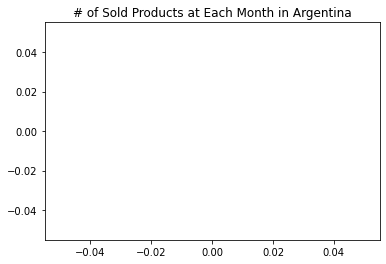

In [26]:
plt.plot(train[train['country']=='Argentina'][['month','num_sold']].groupby('month').sum())
plt.title('# of Sold Products at Each Month in Argentina')

Text(0.5, 1.0, '# of Sold Products at Each Month in Canada')

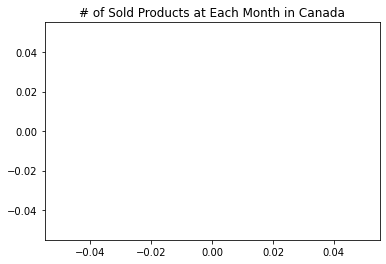

In [27]:
plt.plot(train[train['country']=='Canada'][['month','num_sold']].groupby('month').sum())
plt.title('# of Sold Products at Each Month in Canada')

Text(0.5, 1.0, '# of Sold Products at Each Month in Estonia')

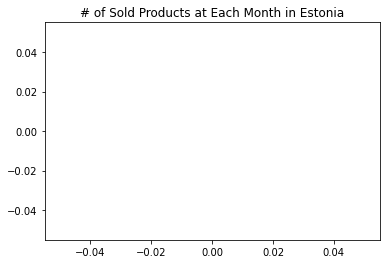

In [28]:
plt.plot(train[train['country']=='Estonia'][['month','num_sold']].groupby('month').sum())
plt.title('# of Sold Products at Each Month in Estonia')

Text(0.5, 1.0, '# of Sold Products at Each Month in Japan')

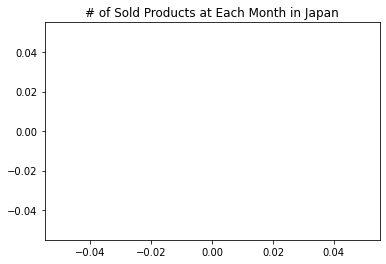

In [29]:
plt.plot(train[train['country']=='Japan'][['month','num_sold']].groupby('month').sum())
plt.title('# of Sold Products at Each Month in Japan')

Text(0.5, 1.0, '# of Sold Products at Each Month in Spain')

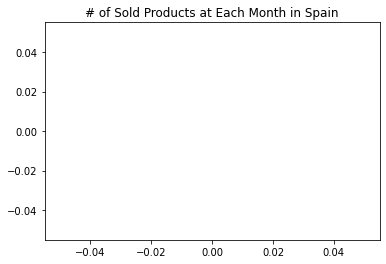

In [30]:
plt.plot(train[train['country']=='Spain'][['month','num_sold']].groupby('month').sum())
plt.title('# of Sold Products at Each Month in Spain')

Text(0.5, 1.0, '# of Sold Products at Each Month Everywhere')

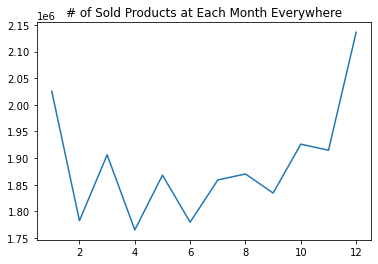

In [31]:
plt.plot(train[['month','num_sold']].groupby('month').sum())
plt.title('# of Sold Products at Each Month Everywhere')

In [32]:
model_train['sale_trend_general'] = 1 
model_train.loc[(model_train['month']==2) | (model_train['month']==4) |(model_train['month']==6) |
                (model_train['month']==9) |(model_train['month']==11),'sale_trend_general'] = 0 
# If it's in the trending regions of the months of December or January, it marks

model_test['sale_trend_general'] = 1 
model_test.loc[(model_test['month']==2) | (model_test['month']==4) |(model_test['month']==6) |
                (model_test['month']==9) |(model_test['month']==11),'sale_trend_general'] = 0

#### Each Day in January and December

Text(0.5, 1.0, '# of Sold Products Each Day in December in Spain')

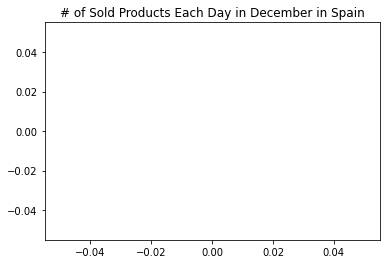

In [33]:
plt.plot(train[(train['country']=='Spain')& (train['month']==12)][['day','num_sold']].groupby('day').sum())
plt.title('# of Sold Products Each Day in December in Spain')

Text(0.5, 1.0, '# of Sold Products Each Day in January in Spain')

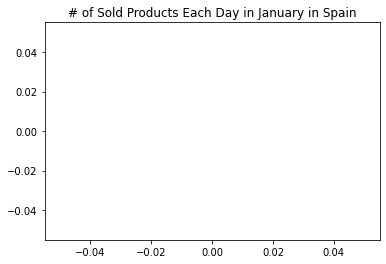

In [34]:
plt.plot(train[(train['country']=='Spain')& (train['month']==1)][['day','num_sold']].groupby('day').sum())
plt.title('# of Sold Products Each Day in January in Spain')

Text(0.5, 1.0, '# of Sold Products Each Day in December in Canada')

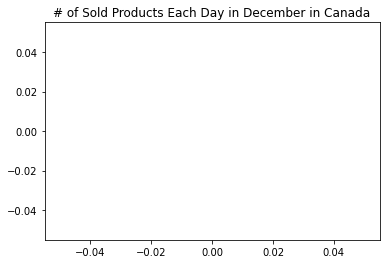

In [35]:
plt.plot(train[(train['country']=='Canada')& (train['month']==12)][['day','num_sold']].groupby('day').sum())
plt.title('# of Sold Products Each Day in December in Canada')

Text(0.5, 1.0, '# of Sold Products Each Day in January in Canada')

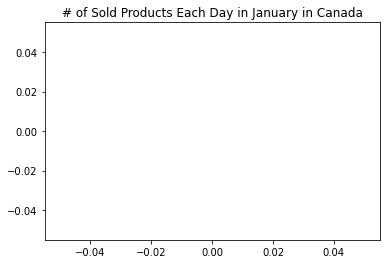

In [36]:
plt.plot(train[(train['country']=='Canada')& (train['month']==1)][['day','num_sold']].groupby('day').sum())
plt.title('# of Sold Products Each Day in January in Canada')

Text(0.5, 1.0, '# of Sold Products Each Day in December in Estonia')

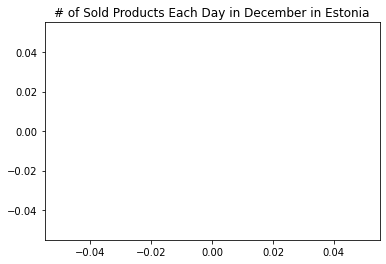

In [37]:
plt.plot(train[(train['country']=='Estonia')& (train['month']==12)][['day','num_sold']].groupby('day').sum())
plt.title('# of Sold Products Each Day in December in Estonia')

Text(0.5, 1.0, '# of Sold Products Each Day in January in Estonia')

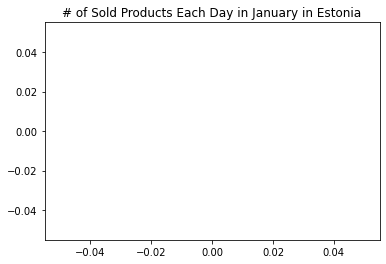

In [38]:
plt.plot(train[(train['country']=='Estonia')& (train['month']==1)][['day','num_sold']].groupby('day').sum())
plt.title('# of Sold Products Each Day in January in Estonia')

Text(0.5, 1.0, '# of Sold Products Each Day in December in Argentina')

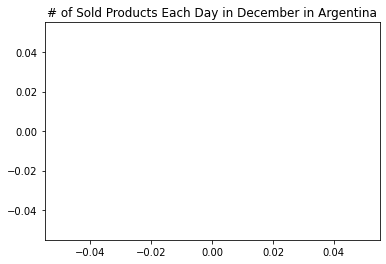

In [39]:
plt.plot(train[(train['country']=='Argentina')& (train['month']==12)][['day','num_sold']].groupby('day').sum())
plt.title('# of Sold Products Each Day in December in Argentina')

Text(0.5, 1.0, '# of Sold Products Each Day in January in Argentina')

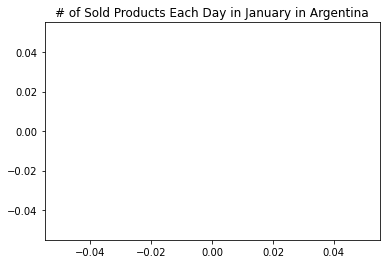

In [40]:
plt.plot(train[(train['country']=='Argentina')& (train['month']==1)][['day','num_sold']].groupby('day').sum())
plt.title('# of Sold Products Each Day in January in Argentina')

Text(0.5, 1.0, '# of Sold Products Each Day in December in Japan')

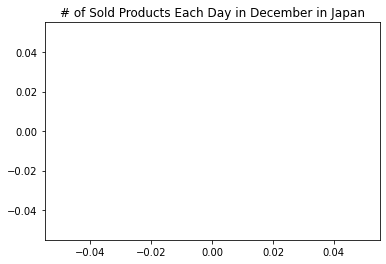

In [41]:
plt.plot(train[(train['country']=='Japan')& (train['month']==12)][['day','num_sold']].groupby('day').sum())
plt.title('# of Sold Products Each Day in December in Japan')

Text(0.5, 1.0, '# of Sold Products Each Day in January in Japan')

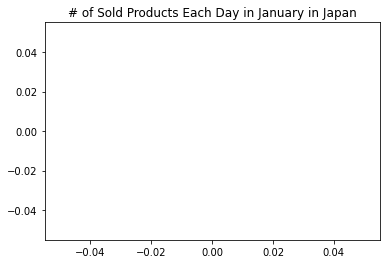

In [42]:
plt.plot(train[(train['country']=='Japan')& (train['month']==1)][['day','num_sold']].groupby('day').sum())
plt.title('# of Sold Products Each Day in January in Japan')

Text(0.5, 1.0, '# of Sold Products Each Day in December Everywhere')

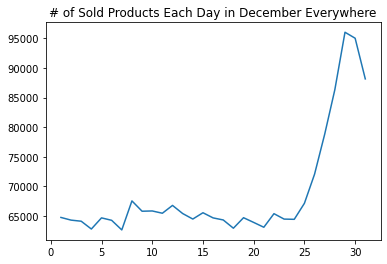

In [43]:
plt.plot(train[(train['month']==12)][['day','num_sold']].groupby('day').sum())
plt.title('# of Sold Products Each Day in December Everywhere')

Text(0.5, 1.0, '# of Sold Products Each Day in January Everywhere')

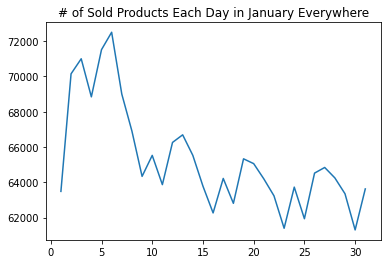

In [44]:
plt.plot(train[(train['month']==1)][['day','num_sold']].groupby('day').sum())
plt.title('# of Sold Products Each Day in January Everywhere')

In [45]:
model_train['sale_trend_dec_jan'] = 0 
model_train.loc[(((model_train['month']==12) & (model_train['day']>=25))|((model_train['month']==1) & (model_train['day']<=6))) & 
                (model_train['country'] != 'Japan'),'sale_trend_dec_jan'] = 1 
# If it's in the trending regions of the months of December or January, it marks

model_test['sale_trend_dec_jan'] = 0 
model_test.loc[(((model_test['month']==12) & (model_test['day']>=25))|((model_test['month']==1) & (model_test['day']<=6))) & 
                (model_test['country'] != 'Japan'),'sale_trend_dec_jan'] = 1 

### Seasonality for Each Product

#### Each Month

In [46]:
train['product'].unique()

array([0, 1, 4, 2, 3])

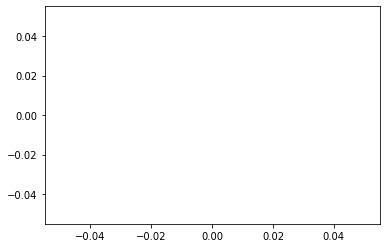

In [47]:
plt.plot(train[train['country']=='Japan'][['year','num_sold']].groupby('year').sum())

In [48]:
train[['store','product','num_sold']].groupby(['store','product']).sum()

num_sold
store product           
0     0        4191082.0
      1        4139671.0
      2        3501840.0
      3        3180699.0
      4         648043.0
1     0        1138862.0
      1        1124319.0
      2         950504.0
      3         863978.0
      4         173393.0
2     0         739337.0
      1         729985.0
      2         615969.0
      3         559515.0
      4         111128.0

### Time Series Analysis

In [49]:
model_train_ta = model_train.drop(['year','month','day','is_month_start','is_month_end','is_quarter_start','is_quarter_end'],axis=1)
model_test_ta = model_test.drop(['year','month','day','is_month_start','is_month_end','is_quarter_start','is_quarter_end'],axis=1)

In [50]:
model_train_ta['date'] = pd.to_datetime(model_train_ta['date'])
model_test_ta['date'] = pd.to_datetime(model_test_ta['date'])

In [51]:
model_train_ta_c0 = model_train_ta[model_train_ta['country']==0]
model_train_ta_c1 = model_train_ta[model_train_ta['country']==1]
model_train_ta_c2 = model_train_ta[model_train_ta['country']==2]
model_train_ta_c3 = model_train_ta[model_train_ta['country']==3]
model_train_ta_c4 = model_train_ta[model_train_ta['country']==4]

model_test_ta_c0 = model_test_ta[model_test_ta['country']==0]
model_test_ta_c1 = model_test_ta[model_test_ta['country']==1]
model_test_ta_c2 = model_test_ta[model_test_ta['country']==2]
model_test_ta_c3 = model_test_ta[model_test_ta['country']==3]
model_test_ta_c4 = model_test_ta[model_test_ta['country']==4]

In [52]:
model_train_ta_s0 = model_train_ta[model_train_ta['store']==0]
model_train_ta_s1 = model_train_ta[model_train_ta['store']==1]
model_train_ta_s2 = model_train_ta[model_train_ta['store']==2]

model_test_ta_s0 = model_test_ta[model_test_ta['store']==0]
model_test_ta_s1 = model_test_ta[model_test_ta['store']==1]
model_test_ta_s2 = model_test_ta[model_test_ta['store']==2]

In [53]:
model_train_ta_p0 = model_train_ta[model_train_ta['product']==0]
model_train_ta_p1 = model_train_ta[model_train_ta['product']==1]
model_train_ta_p2 = model_train_ta[model_train_ta['product']==2]
model_train_ta_p3 = model_train_ta[model_train_ta['product']==3]
model_train_ta_p4 = model_train_ta[model_train_ta['product']==4]

model_test_ta_p0 = model_test_ta[model_test_ta['product']==0]
model_test_ta_p1 = model_test_ta[model_test_ta['product']==1]
model_test_ta_p2 = model_test_ta[model_test_ta['product']==2]
model_test_ta_p3 = model_test_ta[model_test_ta['product']==3]
model_test_ta_p4 = model_test_ta[model_test_ta['product']==4]

In [54]:
model_train_ta_c0_values = model_train_ta_c0[['date','num_sold']].groupby(['date']).sum().values
model_train_ta_c1_values = model_train_ta_c1[['date','num_sold']].groupby(['date']).sum().values
model_train_ta_c2_values = model_train_ta_c2[['date','num_sold']].groupby(['date']).sum().values
model_train_ta_c3_values = model_train_ta_c3[['date','num_sold']].groupby(['date']).sum().values
model_train_ta_c4_values = model_train_ta_c4[['date','num_sold']].groupby(['date']).sum().values

model_train_ta_c0_values_mean = model_train_ta_c0[['date','num_sold']].groupby(['date']).mean().values
model_train_ta_c1_values_mean = model_train_ta_c1[['date','num_sold']].groupby(['date']).mean().values
model_train_ta_c2_values_mean = model_train_ta_c2[['date','num_sold']].groupby(['date']).mean().values
model_train_ta_c3_values_mean = model_train_ta_c3[['date','num_sold']].groupby(['date']).mean().values
model_train_ta_c4_values_mean = model_train_ta_c4[['date','num_sold']].groupby(['date']).mean().values

In [55]:
model_train_ta_s0_values = model_train_ta_s0[['date','num_sold']].groupby(['date']).sum().values
model_train_ta_s1_values = model_train_ta_s1[['date','num_sold']].groupby(['date']).sum().values
model_train_ta_s2_values = model_train_ta_s2[['date','num_sold']].groupby(['date']).sum().values

model_train_ta_s0_values_mean = model_train_ta_s0[['date','num_sold']].groupby(['date']).mean().values
model_train_ta_s1_values_mean = model_train_ta_s1[['date','num_sold']].groupby(['date']).mean().values
model_train_ta_s2_values_mean = model_train_ta_s2[['date','num_sold']].groupby(['date']).mean().values

In [56]:
model_train_ta_p0_values = model_train_ta_p0[['date','num_sold']].groupby(['date']).sum().values
model_train_ta_p1_values = model_train_ta_p1[['date','num_sold']].groupby(['date']).sum().values
model_train_ta_p2_values = model_train_ta_p2[['date','num_sold']].groupby(['date']).sum().values
model_train_ta_p3_values = model_train_ta_p3[['date','num_sold']].groupby(['date']).sum().values
model_train_ta_p4_values = model_train_ta_p4[['date','num_sold']].groupby(['date']).sum().values

model_train_ta_p0_values_mean = model_train_ta_p0[['date','num_sold']].groupby(['date']).mean().values
model_train_ta_p1_values_mean = model_train_ta_p1[['date','num_sold']].groupby(['date']).mean().values
model_train_ta_p2_values_mean = model_train_ta_p2[['date','num_sold']].groupby(['date']).mean().values
model_train_ta_p3_values_mean = model_train_ta_p3[['date','num_sold']].groupby(['date']).mean().values
model_train_ta_p4_values_mean = model_train_ta_p4[['date','num_sold']].groupby(['date']).mean().values

In [57]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.ar_model import AutoReg

#### AR Model for Country 0

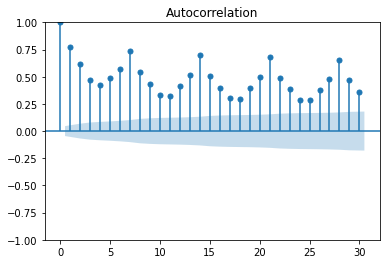

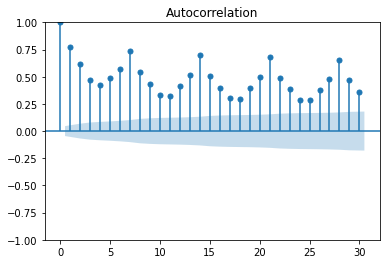

In [58]:
plot_acf(model_train_ta_c0_values, lags=30)

C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


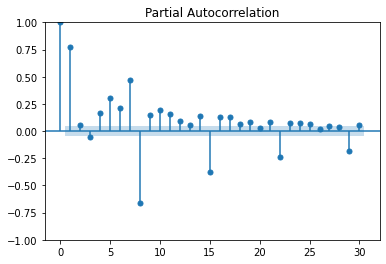

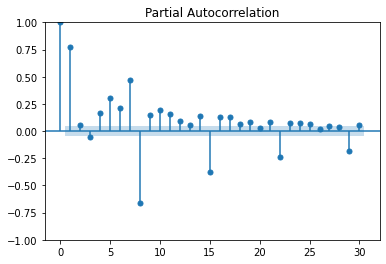

In [59]:
plot_pacf(model_train_ta_c0_values, lags=30)

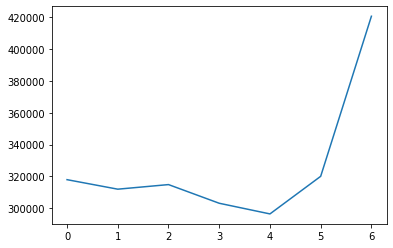

In [60]:
mse = []
for i in range(7):
    ar_model_c0 = AutoReg(model_train_ta_c0_values, lags = i+1).fit()
    pred = ar_model_c0.predict(start=len(model_train_ta_c0_values)-25, end=len(model_train_ta_c0_values)-1)
    true = model_train_ta_c0_values[len(model_train_ta_c0_values)-25:]
    mse.append(mean_squared_error(true,pred))

plt.plot(mse)

In [61]:
ar_model_c0 = AutoReg(model_train_ta_c0_values, lags = 5).fit()
ar_model_c0.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                      y   No. Observations:                 1825
Model:                     AutoReg(5)   Log Likelihood              -13004.592
Method:               Conditional MLE   S.D. of innovations            306.875
Date:                Wed, 26 Jul 2023   AIC                          26023.184
Time:                        15:24:10   BIC                          26061.730
Sample:                             5   HQIC                         26037.405
                                 1825                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        385.1139     65.225      5.904      0.000     257.275     512.953
y.L1           0.6922      0.022     31.173      0.000       0.649       0.736
y.L2           0.1484      0.027      5.406      0.000       0.095       0.202
y.L3          -0.2094      0.027     -7.686      0.000      -0.263      -0.156
y.L4          -0.0603      0.027     -2.194      0.028      -0.114      -0.006
y.L5           0.3291      0.022     14.650      0.000       0.285       0.373
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0525           -0.0000j            1.0525           -0.0000
AR.2            0.6954           -1.0120j            1.2279           -0.1542
AR.3            0.6954           +1.0120j            1.2279            0.1542
AR.4           -1.1301           -0.7985j            1.3837           -0.4021
AR.5           -1.1301           +0.7985j            1.3837            0.4021
-----------------------------------------------------------------------------
"""

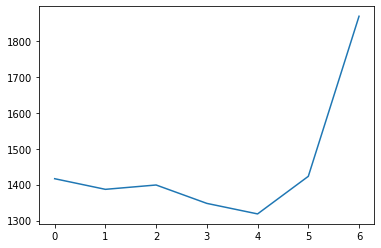

In [62]:
mse = []
for i in range(7):
    ar_model_c0 = AutoReg(model_train_ta_c0_values_mean, lags = i+1).fit()
    pred = ar_model_c0.predict(start=len(model_train_ta_c0_values_mean)-25, end=len(model_train_ta_c0_values_mean)-1)
    true = model_train_ta_c0_values_mean[len(model_train_ta_c0_values_mean)-25:]
    mse.append(mean_squared_error(true,pred))

plt.plot(mse)

In [63]:
pred = ar_model_c0.predict(start=len(model_train_ta_c0_values), end=len(model_train_ta_c0_values)+364-1)

In [64]:
ar_model_c0 = AutoReg(model_train_ta_c0_values_mean, lags = 5).fit()
ar_model_c0.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                      y   No. Observations:                 1825
Model:                     AutoReg(5)   Log Likelihood               -8075.810
Method:               Conditional MLE   S.D. of innovations             20.457
Date:                Wed, 26 Jul 2023   AIC                          16165.620
Time:                        15:24:10   BIC                          16204.167
Sample:                             5   HQIC                         16179.841
                                 1825                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         25.7515      4.347      5.925      0.000      17.233      34.271
y.L1           0.6922      0.022     31.171      0.000       0.649       0.736
y.L2           0.1485      0.027      5.407      0.000       0.095       0.202
y.L3          -0.2093      0.027     -7.684      0.000      -0.263      -0.156
y.L4          -0.0606      0.027     -2.206      0.027      -0.114      -0.007
y.L5           0.3291      0.022     14.660      0.000       0.285       0.373
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0527           -0.0000j            1.0527           -0.0000
AR.2            0.6956           -1.0119j            1.2279           -0.1542
AR.3            0.6956           +1.0119j            1.2279            0.1542
AR.4           -1.1299           -0.7985j            1.3836           -0.4021
AR.5           -1.1299           +0.7985j            1.3836            0.4021
-----------------------------------------------------------------------------
"""

In [65]:
pred_mean = ar_model_c0.predict(start=len(model_train_ta_c0_values_mean), end=len(model_train_ta_c0_values_mean)+364-1)

In [66]:
df = { 'date': model_test_ta_c0.groupby('date').sum().reset_index()['date'],
       'num_sold_country': pred}
model_test_ta_c0_pred = pd.DataFrame(df)

In [67]:
df = { 'date': model_test_ta_c0.groupby('date').sum().reset_index()['date'],
       'mean_sold_country': pred_mean}
model_test_ta_c0_pred_mean = pd.DataFrame(df)

In [68]:
model_test_ta_c0 = model_test_ta_c0.merge(model_test_ta_c0_pred)
model_test_ta_c0 = model_test_ta_c0.merge(model_test_ta_c0_pred_mean)

#### AR Model for Country 1

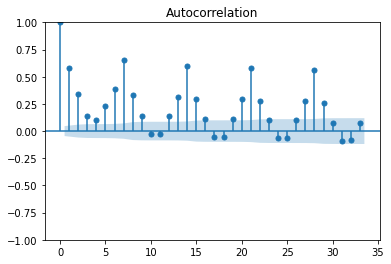

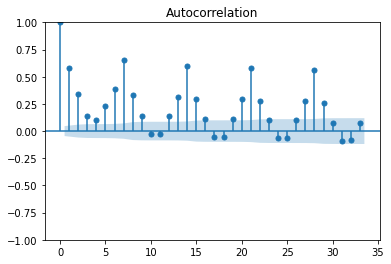

In [69]:
plot_acf(model_train_ta_c1_values)

C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


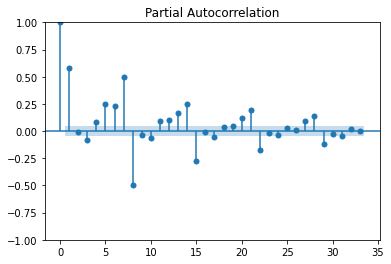

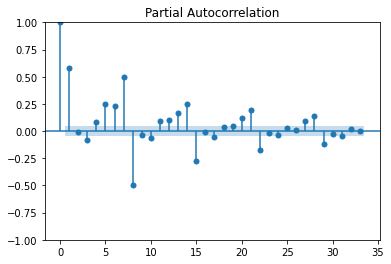

In [70]:
plot_pacf(model_train_ta_c1_values)

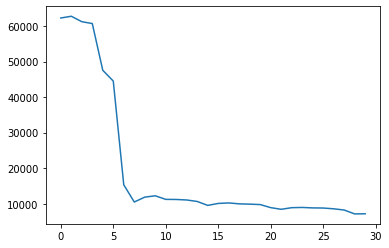

In [71]:
mse = []
for i in range(30):
    ar_model_c1 = AutoReg(model_train_ta_c1_values, lags = i+1).fit()
    pred = ar_model_c1.predict(start=len(model_train_ta_c1_values)-25, end=len(model_train_ta_c1_values)-1)
    true = model_train_ta_c1_values[len(model_train_ta_c1_values)-25:]
    mse.append(mean_squared_error(true,pred))

plt.plot(mse)

In [72]:
ar_model_c1 = AutoReg(model_train_ta_c1_values, lags = 8).fit()
ar_model_c1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                      y   No. Observations:                 1826
Model:                     AutoReg(8)   Log Likelihood              -11454.178
Method:               Conditional MLE   S.D. of innovations            131.827
Date:                Wed, 26 Jul 2023   AIC                          22928.356
Time:                        15:24:11   BIC                          22983.411
Sample:                             8   HQIC                         22948.668
                                 1826                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        382.5375     46.140      8.291      0.000     292.105     472.970
y.L1           0.7400      0.015     47.925      0.000       0.710       0.770
y.L2           0.0249      0.014      1.741      0.082      -0.003       0.053
y.L3          -0.0464      0.014     -3.237      0.001      -0.074      -0.018
y.L4          -0.0303      0.014     -2.110      0.035      -0.058      -0.002
y.L5           0.0022      0.014      0.153      0.878      -0.026       0.030
y.L6          -0.0227      0.014     -1.594      0.111      -0.051       0.005
y.L7           0.8591      0.014     60.187      0.000       0.831       0.887
y.L8          -0.6426      0.014    -45.204      0.000      -0.671      -0.615
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.9158           -0.4397j            1.0159           -0.4288
AR.2           -0.9158           +0.4397j            1.0159            0.4288
AR.3           -0.2311           -1.0030j            1.0292           -0.2860
AR.4           -0.2311           +1.0030j            1.0292            0.2860
AR.5            0.6441           -0.7913j            1.0203           -0.1413
AR.6            0.6441           +0.7913j            1.0203            0.1413
AR.7            1.1023           -0.0000j            1.1023           -0.0000
AR.8            1.2402           -0.0000j            1.2402           -0.0000
-----------------------------------------------------------------------------
"""

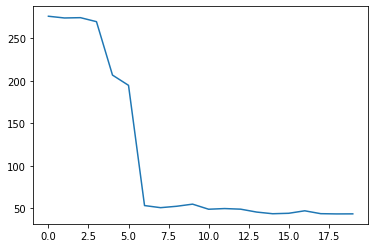

In [73]:
mse = []
for i in range(20):
    ar_model_c1 = AutoReg(model_train_ta_c1_values_mean, lags = i+1).fit()
    pred = ar_model_c1.predict(start=len(model_train_ta_c1_values_mean)-25, end=len(model_train_ta_c1_values_mean)-1)
    true = model_train_ta_c1_values_mean[len(model_train_ta_c1_values_mean)-25:]
    mse.append(mean_squared_error(true,pred))

plt.plot(mse)

In [74]:
pred = ar_model_c1.predict(start=len(model_train_ta_c1_values), end=len(model_train_ta_c1_values)+364-1)

In [75]:
ar_model_c1 = AutoReg(model_train_ta_c1_values_mean, lags = 8).fit()
ar_model_c1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                      y   No. Observations:                 1826
Model:                     AutoReg(8)   Log Likelihood               -6531.849
Method:               Conditional MLE   S.D. of innovations              8.793
Date:                Wed, 26 Jul 2023   AIC                          13083.698
Time:                        15:24:12   BIC                          13138.753
Sample:                             8   HQIC                         13104.011
                                 1826                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         28.8154      3.095      9.311      0.000      22.750      34.881
y.L1           0.7886      0.016     48.244      0.000       0.757       0.821
y.L2           0.0198      0.014      1.381      0.167      -0.008       0.048
y.L3          -0.0479      0.014     -3.342      0.001      -0.076      -0.020
y.L4          -0.0376      0.014     -2.617      0.009      -0.066      -0.009
y.L5           0.0056      0.014      0.388      0.698      -0.023       0.034
y.L6          -0.0084      0.014     -0.583      0.560      -0.036       0.020
y.L7           0.8432      0.014     59.739      0.000       0.815       0.871
y.L8          -0.6944      0.016    -43.441      0.000      -0.726      -0.663
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.9176           -0.4404j            1.0178           -0.4288
AR.2           -0.9176           +0.4404j            1.0178            0.4288
AR.3           -0.2350           -1.0022j            1.0294           -0.2867
AR.4           -0.2350           +1.0022j            1.0294            0.2867
AR.5            0.6392           -0.7919j            1.0177           -0.1419
AR.6            0.6392           +0.7919j            1.0177            0.1419
AR.7            1.1206           -0.1046j            1.1254           -0.0148
AR.8            1.1206           +0.1046j            1.1254            0.0148
-----------------------------------------------------------------------------
"""

In [76]:
pred_mean = ar_model_c1.predict(start=len(model_train_ta_c1_values_mean), end=len(model_train_ta_c1_values_mean)+364-1)

In [77]:
df = { 'date': model_test_ta_c1.groupby('date').sum().reset_index()['date'],
       'num_sold_country': pred}
model_test_ta_c1_pred = pd.DataFrame(df)

In [78]:
df = { 'date': model_test_ta_c1.groupby('date').sum().reset_index()['date'],
       'mean_sold_country': pred_mean}
model_test_ta_c1_pred_mean = pd.DataFrame(df)

In [79]:
model_test_ta_c1 = model_test_ta_c1.merge(model_test_ta_c1_pred)

In [80]:
model_test_ta_c1 = model_test_ta_c1.merge(model_test_ta_c1_pred_mean)

#### AR Model for Country 2

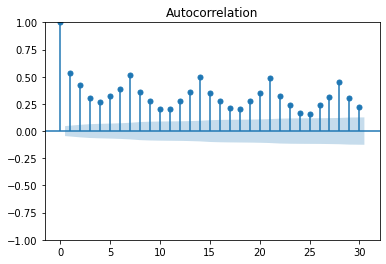

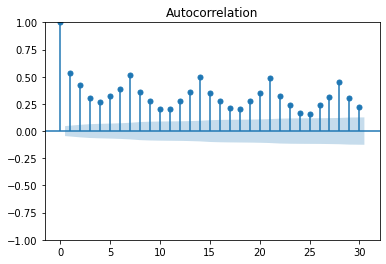

In [81]:
plot_acf(model_train_ta_c2_values, lags=30)

C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


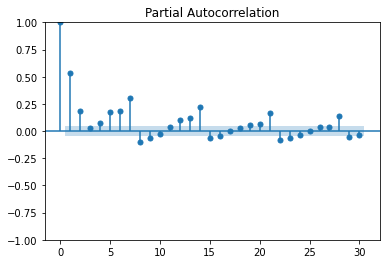

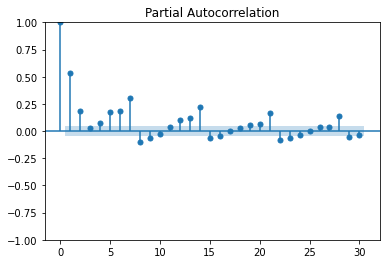

In [82]:
plot_pacf(model_train_ta_c2_values, lags=30)

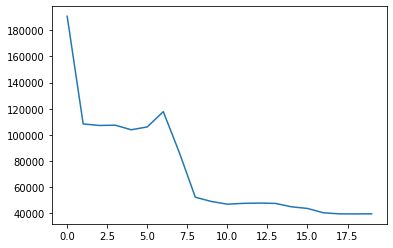

In [83]:
mse = []
for i in range(20):
    ar_model_c2 = AutoReg(model_train_ta_c2_values, lags = i+1).fit()
    pred = ar_model_c2.predict(start=len(model_train_ta_c2_values)-25, end=len(model_train_ta_c2_values)-1)
    true = model_train_ta_c2_values[len(model_train_ta_c2_values)-25:]
    mse.append(mean_squared_error(true,pred))

plt.plot(mse)

In [84]:
ar_model_c2 = AutoReg(model_train_ta_c2_values, lags = 15).fit()

In [85]:
pred = ar_model_c2.predict(start=len(model_train_ta_c2_values), end=len(model_train_ta_c2_values)+365-1)

In [86]:
df = { 'date': model_test_ta_c2.groupby('date').sum().reset_index()['date'],
       'num_sold_country': pred}
model_test_ta_c2_pred = pd.DataFrame(df)
model_test_ta_c2 = model_test_ta_c2.merge(model_test_ta_c2_pred)

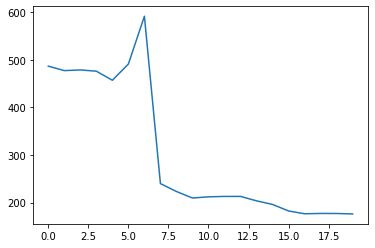

In [87]:
mse = []
for i in range(20):
    ar_model_c2 = AutoReg(model_train_ta_c2_values_mean, lags = i+1).fit()
    pred = ar_model_c2.predict(start=len(model_train_ta_c2_values_mean)-25, end=len(model_train_ta_c2_values_mean)-1)
    true = model_train_ta_c2_values_mean[len(model_train_ta_c2_values_mean)-25:]
    mse.append(mean_squared_error(true,pred))

plt.plot(mse)

In [88]:
ar_model_c2 = AutoReg(model_train_ta_c2_values_mean, lags = 10).fit()
ar_model_c2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                      y   No. Observations:                 1826
Model:                    AutoReg(10)   Log Likelihood               -6092.235
Method:               Conditional MLE   S.D. of innovations              6.930
Date:                Wed, 26 Jul 2023   AIC                          12208.471
Time:                        15:24:13   BIC                          12274.523
Sample:                            10   HQIC                         12232.842
                                 1826                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.8573      1.662      4.127      0.000       3.600      10.114
y.L1           0.9331      0.022     41.703      0.000       0.889       0.977
y.L2           0.1511      0.031      4.852      0.000       0.090       0.212
y.L3          -0.3134      0.025    -12.695      0.000      -0.362      -0.265
y.L4          -0.0368      0.015     -2.441      0.015      -0.066      -0.007
y.L5           0.0021      0.015      0.139      0.890      -0.028       0.032
y.L6           0.0040      0.015      0.265      0.791      -0.026       0.034
y.L7           0.8799      0.015     58.168      0.000       0.850       0.910
y.L8          -0.8364      0.025    -34.093      0.000      -0.884      -0.788
y.L9          -0.1355      0.031     -4.341      0.000      -0.197      -0.074
y.L10          0.3093      0.023     13.625      0.000       0.265       0.354
                                    Roots                                     
==============================================================================
                   Real          Imaginary           Modulus         Frequency
------------------------------------------------------------------------------
AR.1            -0.9138           -0.4469j            1.0172           -0.4276
AR.2            -0.9138           +0.4469j            1.0172            0.4276
AR.3            -0.2304           -0.9881j            1.0146           -0.2865
AR.4            -0.2304           +0.9881j            1.0146            0.2865
AR.5            -1.8542           -0.0000j            1.8542           -0.5000
AR.6             0.6355           -0.7991j            1.0210           -0.1431
AR.7             0.6355           +0.7991j            1.0210            0.1431
AR.8             1.1416           -0.4759j            1.2369           -0.0629
AR.9             1.1416           +0.4759j            1.2369            0.0629
AR.10            1.0263           -0.0000j            1.0263           -0.0000
------------------------------------------------------------------------------
"""

In [89]:
pred_mean = ar_model_c2.predict(start=len(model_train_ta_c2_values_mean), end=len(model_train_ta_c2_values_mean)+365-1)

In [90]:
df = { 'date': model_test_ta_c2.groupby('date').sum().reset_index()['date'],
       'mean_sold_country': pred_mean}
model_test_ta_c2_pred_mean = pd.DataFrame(df)

In [91]:
model_test_ta_c2 = model_test_ta_c2.merge(model_test_ta_c2_pred_mean)

#### AR Model for Country 3

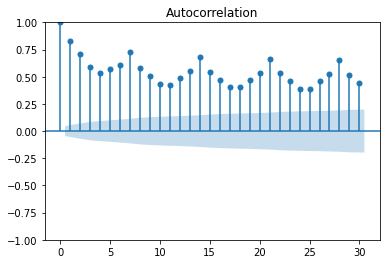

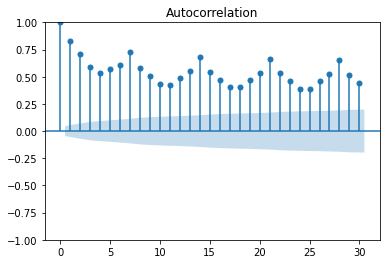

In [92]:
plot_acf(model_train_ta_c3_values, lags=30)

C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


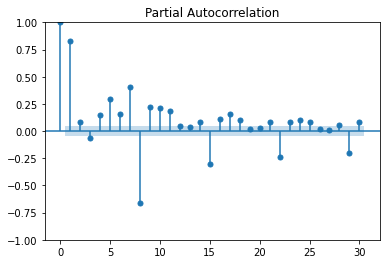

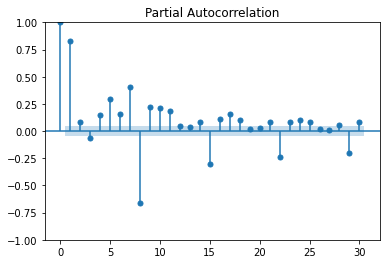

In [93]:
plot_pacf(model_train_ta_c3_values, lags=30)

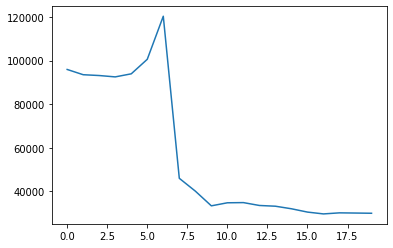

In [94]:
mse = []
for i in range(20):
    ar_model_c3 = AutoReg(model_train_ta_c3_values, lags = i+1).fit()
    pred = ar_model_c3.predict(start=len(model_train_ta_c3_values)-25, end=len(model_train_ta_c3_values)-1)
    true = model_train_ta_c3_values[len(model_train_ta_c3_values)-25:]
    mse.append(mean_squared_error(true,pred))

plt.plot(mse)

In [95]:
ar_model_c3 = AutoReg(model_train_ta_c3_values, lags = 10).fit()

In [96]:
pred = ar_model_c3.predict(start=len(model_train_ta_c3_values), end=len(model_train_ta_c3_values)+365-1)
df = { 'date': model_test_ta_c3.groupby('date').sum().reset_index()['date'],
       'num_sold_country': pred}
model_test_ta_c3_pred = pd.DataFrame(df)
model_test_ta_c3 = model_test_ta_c3.merge(model_test_ta_c3_pred)

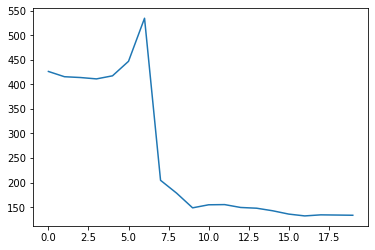

In [97]:
mse = []
for i in range(20):
    ar_model_c3 = AutoReg(model_train_ta_c3_values_mean, lags = i+1).fit()
    pred = ar_model_c3.predict(start=len(model_train_ta_c3_values_mean)-25, end=len(model_train_ta_c3_values_mean)-1)
    true = model_train_ta_c3_values_mean[len(model_train_ta_c3_values_mean)-25:]
    mse.append(mean_squared_error(true,pred))

plt.plot(mse)

In [98]:
ar_model_c3 = AutoReg(model_train_ta_c3_values_mean, lags = 10).fit()
ar_model_c3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                      y   No. Observations:                 1825
Model:                    AutoReg(10)   Log Likelihood               -5792.422
Method:               Conditional MLE   S.D. of innovations              5.885
Date:                Wed, 26 Jul 2023   AIC                          11608.844
Time:                        15:24:14   BIC                          11674.890
Sample:                            10   HQIC                         11633.214
                                 1825                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.8599      1.087      2.631      0.009       0.729       4.991
y.L1           0.9997      0.022     45.044      0.000       0.956       1.043
y.L2           0.1588      0.032      4.929      0.000       0.096       0.222
y.L3          -0.3444      0.025    -13.811      0.000      -0.393      -0.296
y.L4          -0.0457      0.016     -2.921      0.003      -0.076      -0.015
y.L5           0.0042      0.016      0.269      0.788      -0.027       0.035
y.L6           0.0172      0.016      1.095      0.273      -0.014       0.048
y.L7           0.8785      0.016     55.930      0.000       0.848       0.909
y.L8          -0.8997      0.025    -36.455      0.000      -0.948      -0.851
y.L9          -0.1248      0.032     -3.860      0.000      -0.188      -0.061
y.L10          0.3350      0.023     14.677      0.000       0.290       0.380
                                    Roots                                     
==============================================================================
                   Real          Imaginary           Modulus         Frequency
------------------------------------------------------------------------------
AR.1            -0.9140           -0.4454j            1.0168           -0.4278
AR.2            -0.9140           +0.4454j            1.0168            0.4278
AR.3            -0.2333           -0.9878j            1.0150           -0.2869
AR.4            -0.2333           +0.9878j            1.0150            0.2869
AR.5            -1.8485           -0.0000j            1.8485           -0.5000
AR.6             0.6372           -0.7986j            1.0217           -0.1428
AR.7             0.6372           +0.7986j            1.0217            0.1428
AR.8             1.1134           -0.4381j            1.1965           -0.0597
AR.9             1.1134           +0.4381j            1.1965            0.0597
AR.10            1.0146           -0.0000j            1.0146           -0.0000
------------------------------------------------------------------------------
"""

In [99]:
pred_mean = ar_model_c3.predict(start=len(model_train_ta_c3_values_mean), end=len(model_train_ta_c3_values_mean)+365-1)

In [100]:
df = { 'date': model_test_ta_c3.groupby('date').sum().reset_index()['date'],
       'mean_sold_country': pred_mean}
model_test_ta_c3_pred_mean = pd.DataFrame(df)

In [101]:
model_test_ta_c3 = model_test_ta_c3.merge(model_test_ta_c3_pred_mean)

#### AR Model for Country 4

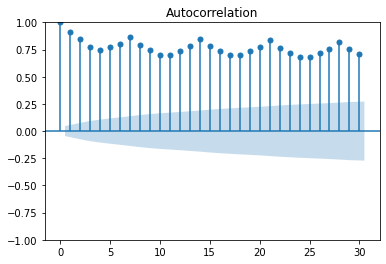

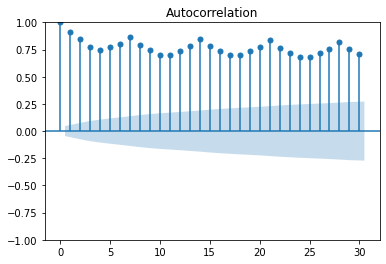

In [102]:
plot_acf(model_train_ta_c4_values, lags=30)

C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


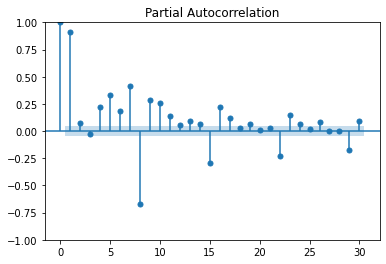

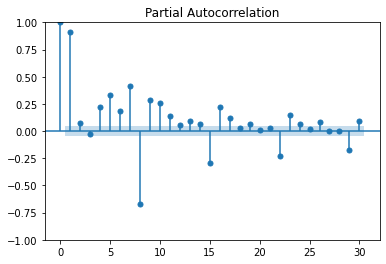

In [103]:
plot_pacf(model_train_ta_c4_values, lags=30)

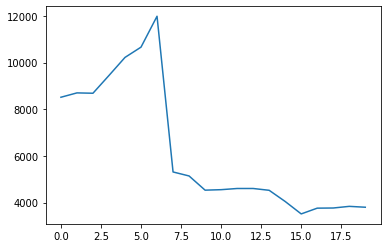

In [104]:
mse = []
for i in range(20):
    ar_model_c4 = AutoReg(model_train_ta_c4_values, lags = i+1).fit()
    pred = ar_model_c4.predict(start=len(model_train_ta_c4_values)-25, end=len(model_train_ta_c4_values)-1)
    true = model_train_ta_c4_values[len(model_train_ta_c4_values)-25:]
    mse.append(mean_squared_error(true,pred))

plt.plot(mse)

In [105]:
ar_model_c4 = AutoReg(model_train_ta_c4_values, lags = 16).fit()

In [106]:
pred = ar_model_c4.predict(start=len(model_train_ta_c4_values), end=len(model_train_ta_c4_values)+365-1)
df = { 'date': model_test_ta_c4.groupby('date').sum().reset_index()['date'],
       'num_sold_country': pred}
model_test_ta_c4_pred = pd.DataFrame(df)
model_test_ta_c4 = model_test_ta_c4.merge(model_test_ta_c4_pred)

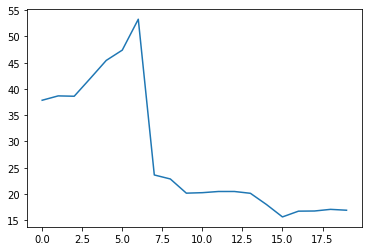

In [107]:
mse = []
for i in range(20):
    ar_model_c4 = AutoReg(model_train_ta_c4_values_mean, lags = i+1).fit()
    pred = ar_model_c4.predict(start=len(model_train_ta_c4_values_mean)-25, end=len(model_train_ta_c4_values_mean)-1)
    true = model_train_ta_c4_values_mean[len(model_train_ta_c4_values_mean)-25:]
    mse.append(mean_squared_error(true,pred))

plt.plot(mse)

In [108]:
ar_model_c4 = AutoReg(model_train_ta_c4_values_mean, lags = 10).fit()
ar_model_c4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                      y   No. Observations:                 1824
Model:                    AutoReg(10)   Log Likelihood               -4548.895
Method:               Conditional MLE   S.D. of innovations              2.970
Date:                Wed, 26 Jul 2023   AIC                           9121.789
Time:                        15:24:16   BIC                           9187.829
Sample:                            10   HQIC                          9146.157
                                 1824                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9723      0.341      2.848      0.004       0.303       1.641
y.L1           1.0429      0.022     46.653      0.000       0.999       1.087
y.L2           0.0541      0.033      1.636      0.102      -0.011       0.119
y.L3          -0.3244      0.025    -12.797      0.000      -0.374      -0.275
y.L4          -0.0148      0.017     -0.890      0.373      -0.047       0.018
y.L5           0.0061      0.017      0.368      0.713      -0.026       0.039
y.L6          -0.0069      0.017     -0.415      0.678      -0.039       0.026
y.L7           0.8745      0.017     52.617      0.000       0.842       0.907
y.L8          -0.9126      0.025    -36.076      0.000      -0.962      -0.863
y.L9          -0.0395      0.033     -1.193      0.233      -0.104       0.025
y.L10          0.3045      0.022     13.590      0.000       0.261       0.348
                                    Roots                                     
==============================================================================
                   Real          Imaginary           Modulus         Frequency
------------------------------------------------------------------------------
AR.1             0.6362           -0.8032j            1.0246           -0.1434
AR.2             0.6362           +0.8032j            1.0246            0.1434
AR.3             1.0096           -0.0000j            1.0096           -0.0000
AR.4             1.0873           -0.4811j            1.1889           -0.0663
AR.5             1.0873           +0.4811j            1.1889            0.0663
AR.6            -0.2284           -0.9925j            1.0185           -0.2860
AR.7            -0.2284           +0.9925j            1.0185            0.2860
AR.8            -0.9160           -0.4447j            1.0182           -0.4281
AR.9            -0.9160           +0.4447j            1.0182            0.4281
AR.10           -2.0382           -0.0000j            2.0382           -0.5000
------------------------------------------------------------------------------
"""

In [109]:
pred_mean = ar_model_c4.predict(start=len(model_train_ta_c4_values_mean), end=len(model_train_ta_c4_values_mean)+365-1)

In [110]:
df = { 'date': model_test_ta_c4.groupby('date').sum().reset_index()['date'],
       'mean_sold_country': pred_mean}
model_test_ta_c4_pred_mean = pd.DataFrame(df)

In [111]:
model_test_ta_c4 = model_test_ta_c4.merge(model_test_ta_c4_pred_mean)

#### AR Model for Store 0

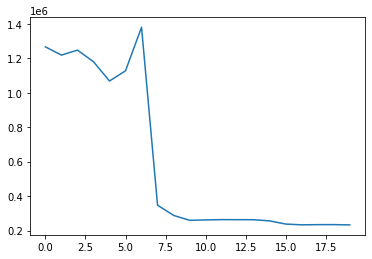

In [112]:
mse = []
for i in range(20):
    ar_model_s0 = AutoReg(model_train_ta_s0_values, lags = i+1).fit()
    pred = ar_model_s0.predict(start=len(model_train_ta_s0_values)-25, end=len(model_train_ta_s0_values)-1)
    true = model_train_ta_s0_values[len(model_train_ta_s0_values)-25:]
    mse.append(mean_squared_error(true,pred))

plt.plot(mse)

In [113]:
ar_model_s0 = AutoReg(model_train_ta_s0_values, lags = 10).fit()
ar_model_s0.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                      y   No. Observations:                 1826
Model:                    AutoReg(10)   Log Likelihood              -12709.985
Method:               Conditional MLE   S.D. of innovations            265.059
Date:                Wed, 26 Jul 2023   AIC                          25443.970
Time:                        15:24:16   BIC                          25510.023
Sample:                            10   HQIC                         25468.342
                                 1826                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        240.6316     73.885      3.257      0.001      95.819     385.444
y.L1           1.0154      0.022     45.159      0.000       0.971       1.059
y.L2           0.0701      0.033      2.153      0.031       0.006       0.134
y.L3          -0.2931      0.024    -12.314      0.000      -0.340      -0.246
y.L4          -0.0177      0.011     -1.566      0.117      -0.040       0.004
y.L5           0.0015      0.011      0.136      0.892      -0.021       0.024
y.L6          -0.0034      0.011     -0.298      0.765      -0.026       0.019
y.L7           0.9398      0.011     83.067      0.000       0.918       0.962
y.L8          -0.9632      0.024    -40.494      0.000      -1.010      -0.917
y.L9          -0.0605      0.033     -1.860      0.063      -0.124       0.003
y.L10          0.2834      0.023     12.591      0.000       0.239       0.328
                                    Roots                                     
==============================================================================
                   Real          Imaginary           Modulus         Frequency
------------------------------------------------------------------------------
AR.1             0.6304           -0.7905j            1.0111           -0.1429
AR.2             0.6304           +0.7905j            1.0111            0.1429
AR.3             1.0197           -0.0000j            1.0197           -0.0000
AR.4             1.1620           -0.4406j            1.2428           -0.0577
AR.5             1.1620           +0.4406j            1.2428            0.0577
AR.6            -0.2264           -0.9823j            1.0081           -0.2861
AR.7            -0.2264           +0.9823j            1.0081            0.2861
AR.8            -0.9070           -0.4387j            1.0075           -0.4283
AR.9            -0.9070           +0.4387j            1.0075            0.4283
AR.10           -2.1241           -0.0000j            2.1241           -0.5000
------------------------------------------------------------------------------
"""

In [114]:
pred_s = ar_model_s0.predict(start=len(model_train_ta_s0_values), end=len(model_train_ta_s0_values)+365-1)

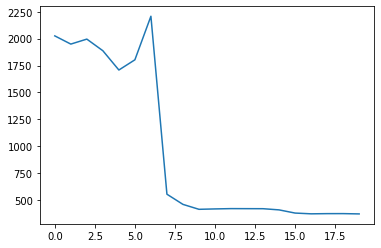

In [115]:
mse = []
for i in range(20):
    ar_model_s0 = AutoReg(model_train_ta_s0_values_mean, lags = i+1).fit()
    pred = ar_model_s0.predict(start=len(model_train_ta_s0_values_mean)-25, end=len(model_train_ta_s0_values_mean)-1)
    true = model_train_ta_s0_values_mean[len(model_train_ta_s0_values_mean)-25:]
    mse.append(mean_squared_error(true,pred))

plt.plot(mse)

In [116]:
ar_model_s0 = AutoReg(model_train_ta_s0_values_mean, lags = 8).fit()
ar_model_s0.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                      y   No. Observations:                 1826
Model:                     AutoReg(8)   Log Likelihood               -7005.048
Method:               Conditional MLE   S.D. of innovations             11.407
Date:                Wed, 26 Jul 2023   AIC                          14030.096
Time:                        15:24:16   BIC                          14085.151
Sample:                             8   HQIC                         14050.409
                                 1826                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         19.2973      3.096      6.232      0.000      13.228      25.366
y.L1           0.8877      0.014     63.738      0.000       0.860       0.915
y.L2           0.0086      0.012      0.706      0.480      -0.015       0.032
y.L3          -0.0337      0.012     -2.778      0.005      -0.057      -0.010
y.L4          -0.0210      0.012     -1.725      0.084      -0.045       0.003
y.L5          -0.0024      0.012     -0.199      0.842      -0.026       0.021
y.L6          -0.0179      0.012     -1.474      0.140      -0.042       0.006
y.L7           0.9304      0.012     76.720      0.000       0.907       0.954
y.L8          -0.8075      0.014    -57.845      0.000      -0.835      -0.780
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.9092           -0.4377j            1.0091           -0.4286
AR.2           -0.9092           +0.4377j            1.0091            0.4286
AR.3           -0.2250           -0.9909j            1.0161           -0.2855
AR.4           -0.2250           +0.9909j            1.0161            0.2855
AR.5            0.6389           -0.7835j            1.0109           -0.1411
AR.6            0.6389           +0.7835j            1.0109            0.1411
AR.7            1.0714           -0.0682j            1.0736           -0.0101
AR.8            1.0714           +0.0682j            1.0736            0.0101
-----------------------------------------------------------------------------
"""

In [117]:
pred_mean = ar_model_s0.predict(start=len(model_train_ta_s0_values_mean), end=len(model_train_ta_s0_values_mean)+365-1)

In [118]:
df = { 'date': model_test_ta_s0.groupby('date').sum().reset_index()['date'],
       'num_sold_store': pred_s}
model_test_ta_s0_pred = pd.DataFrame(df)

In [119]:
df = { 'date': model_test_ta_s0.groupby('date').sum().reset_index()['date'],
       'mean_sold_store': pred_mean}
model_test_ta_s0_pred_mean = pd.DataFrame(df)

In [120]:
model_test_ta_s0 = model_test_ta_s0.merge(model_test_ta_s0_pred)

In [121]:
model_test_ta_s0 = model_test_ta_s0.merge(model_test_ta_s0_pred_mean)

#### AR Model for Store 1

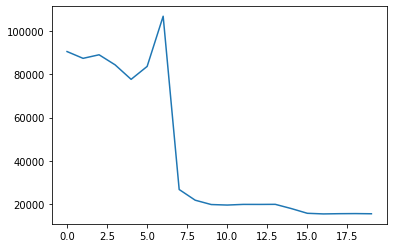

In [122]:
mse = []
for i in range(20):
    ar_model_s1 = AutoReg(model_train_ta_s1_values, lags = i+1).fit()
    pred = ar_model_s1.predict(start=len(model_train_ta_s1_values)-25, end=len(model_train_ta_s1_values)-1)
    true = model_train_ta_s1_values[len(model_train_ta_s1_values)-25:]
    mse.append(mean_squared_error(true,pred))

plt.plot(mse)

In [123]:
ar_model_s1 = AutoReg(model_train_ta_s1_values, lags = 10).fit()
ar_model_s1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                      y   No. Observations:                 1826
Model:                    AutoReg(10)   Log Likelihood              -10319.626
Method:               Conditional MLE   S.D. of innovations             71.071
Date:                Wed, 26 Jul 2023   AIC                          20663.252
Time:                        15:24:17   BIC                          20729.304
Sample:                            10   HQIC                         20687.623
                                 1826                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         67.0112     19.655      3.409      0.001      28.488     105.535
y.L1           1.0131      0.022     45.441      0.000       0.969       1.057
y.L2           0.1026      0.033      3.155      0.002       0.039       0.166
y.L3          -0.3234      0.024    -13.659      0.000      -0.370      -0.277
y.L4          -0.0127      0.011     -1.148      0.251      -0.034       0.009
y.L5          -0.0022      0.011     -0.204      0.839      -0.024       0.019
y.L6          -0.0042      0.011     -0.378      0.705      -0.026       0.017
y.L7           0.9438      0.011     85.381      0.000       0.922       0.966
y.L8          -0.9625      0.024    -40.839      0.000      -1.009      -0.916
y.L9          -0.0976      0.033     -2.999      0.003      -0.161      -0.034
y.L10          0.3145      0.022     13.988      0.000       0.270       0.359
                                    Roots                                     
==============================================================================
                   Real          Imaginary           Modulus         Frequency
------------------------------------------------------------------------------
AR.1             0.6295           -0.7901j            1.0102           -0.1429
AR.2             0.6295           +0.7901j            1.0102            0.1429
AR.3             1.0205           -0.0000j            1.0205           -0.0000
AR.4             1.1423           -0.4306j            1.2208           -0.0574
AR.5             1.1423           +0.4306j            1.2208            0.0574
AR.6            -0.2251           -0.9817j            1.0071           -0.2859
AR.7            -0.2251           +0.9817j            1.0071            0.2859
AR.8            -0.9071           -0.4387j            1.0076           -0.4283
AR.9            -0.9071           +0.4387j            1.0076            0.4283
AR.10           -1.9894           -0.0000j            1.9894           -0.5000
------------------------------------------------------------------------------
"""

In [124]:
pred_s = ar_model_s1.predict(start=len(model_train_ta_s1_values), end=len(model_train_ta_s1_values)+365-1)

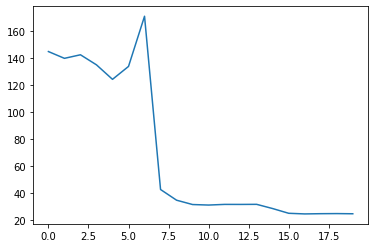

In [125]:
mse = []
for i in range(20):
    ar_model_s1 = AutoReg(model_train_ta_s1_values_mean, lags = i+1).fit()
    pred = ar_model_s1.predict(start=len(model_train_ta_s1_values_mean)-25, end=len(model_train_ta_s1_values_mean)-1)
    true = model_train_ta_s1_values_mean[len(model_train_ta_s1_values_mean)-25:]
    mse.append(mean_squared_error(true,pred))

plt.plot(mse)

In [126]:
ar_model_s1 = AutoReg(model_train_ta_s1_values_mean, lags = 8).fit()
ar_model_s1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                      y   No. Observations:                 1826
Model:                     AutoReg(8)   Log Likelihood               -4624.040
Method:               Conditional MLE   S.D. of innovations              3.079
Date:                Wed, 26 Jul 2023   AIC                           9268.080
Time:                        15:24:17   BIC                           9323.135
Sample:                             8   HQIC                          9288.393
                                 1826                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.4471      0.828      6.575      0.000       3.823       7.071
y.L1           0.8937      0.014     65.403      0.000       0.867       0.920
y.L2           0.0066      0.012      0.558      0.577      -0.017       0.030
y.L3          -0.0341      0.012     -2.865      0.004      -0.057      -0.011
y.L4          -0.0163      0.012     -1.369      0.171      -0.040       0.007
y.L5          -0.0069      0.012     -0.576      0.565      -0.030       0.017
y.L6          -0.0180      0.012     -1.509      0.131      -0.041       0.005
y.L7           0.9347      0.012     78.302      0.000       0.911       0.958
y.L8          -0.8177      0.014    -59.589      0.000      -0.845      -0.791
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.9091           -0.4370j            1.0086           -0.4287
AR.2           -0.9091           +0.4370j            1.0086            0.4287
AR.3           -0.2241           -0.9898j            1.0148           -0.2854
AR.4           -0.2241           +0.9898j            1.0148            0.2854
AR.5            0.6382           -0.7835j            1.0106           -0.1412
AR.6            0.6382           +0.7835j            1.0106            0.1412
AR.7            1.0665           -0.0749j            1.0691           -0.0112
AR.8            1.0665           +0.0749j            1.0691            0.0112
-----------------------------------------------------------------------------
"""

In [127]:
pred_mean = ar_model_s1.predict(start=len(model_train_ta_s1_values_mean), end=len(model_train_ta_s1_values_mean)+365-1)

In [128]:
df = { 'date': model_test_ta_s1.groupby('date').sum().reset_index()['date'],
       'num_sold_store': pred_s}
model_test_ta_s1_pred = pd.DataFrame(df)

In [129]:
df = { 'date': model_test_ta_s1.groupby('date').sum().reset_index()['date'],
       'mean_sold_store': pred_mean}
model_test_ta_s1_pred_mean = pd.DataFrame(df)

In [130]:
model_test_ta_s1 = model_test_ta_s1.merge(model_test_ta_s1_pred)

In [131]:
model_test_ta_s1 = model_test_ta_s1.merge(model_test_ta_s1_pred_mean)

#### AR Model for Store 2

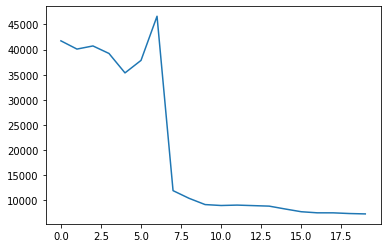

In [132]:
mse = []
for i in range(20):
    ar_model_s2 = AutoReg(model_train_ta_s2_values, lags = i+1).fit()
    pred = ar_model_s2.predict(start=len(model_train_ta_s2_values)-25, end=len(model_train_ta_s2_values)-1)
    true = model_train_ta_s2_values[len(model_train_ta_s2_values)-25:]
    mse.append(mean_squared_error(true,pred))

plt.plot(mse)

In [133]:
ar_model_s2 = AutoReg(model_train_ta_s2_values, lags = 10).fit()
ar_model_s2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                      y   No. Observations:                 1826
Model:                    AutoReg(10)   Log Likelihood               -9545.483
Method:               Conditional MLE   S.D. of innovations             46.404
Date:                Wed, 26 Jul 2023   AIC                          19114.966
Time:                        15:24:18   BIC                          19181.018
Sample:                            10   HQIC                         19139.337
                                 1826                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         40.7714     12.842      3.175      0.001      15.603      65.940
y.L1           1.0024      0.022     44.754      0.000       0.958       1.046
y.L2           0.1085      0.032      3.352      0.001       0.045       0.172
y.L3          -0.3102      0.024    -13.111      0.000      -0.357      -0.264
y.L4          -0.0224      0.011     -2.045      0.041      -0.044      -0.001
y.L5          -0.0001      0.011     -0.011      0.991      -0.022       0.021
y.L6           0.0022      0.011      0.196      0.845      -0.019       0.024
y.L7           0.9413      0.011     85.769      0.000       0.920       0.963
y.L8          -0.9534      0.024    -40.409      0.000      -1.000      -0.907
y.L9          -0.0995      0.032     -3.071      0.002      -0.163      -0.036
y.L10          0.3045      0.023     13.530      0.000       0.260       0.349
                                    Roots                                     
==============================================================================
                   Real          Imaginary           Modulus         Frequency
------------------------------------------------------------------------------
AR.1             0.6305           -0.7894j            1.0103           -0.1427
AR.2             0.6305           +0.7894j            1.0103            0.1427
AR.3             1.0195           -0.0000j            1.0195           -0.0000
AR.4             1.1596           -0.4279j            1.2360           -0.0563
AR.5             1.1596           +0.4279j            1.2360            0.0563
AR.6            -0.2268           -0.9812j            1.0071           -0.2862
AR.7            -0.2268           +0.9812j            1.0071            0.2862
AR.8            -0.9070           -0.4393j            1.0078           -0.4282
AR.9            -0.9070           +0.4393j            1.0078            0.4282
AR.10           -2.0052           -0.0000j            2.0052           -0.5000
------------------------------------------------------------------------------
"""

In [134]:
pred_s = ar_model_s2.predict(start=len(model_train_ta_s2_values), end=len(model_train_ta_s2_values)+365-1)

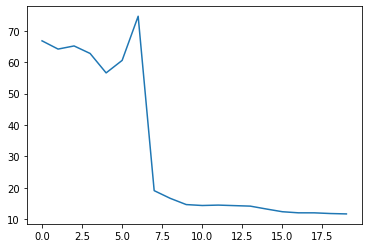

In [135]:
mse = []
for i in range(20):
    ar_model_s2 = AutoReg(model_train_ta_s2_values_mean, lags = i+1).fit()
    pred = ar_model_s2.predict(start=len(model_train_ta_s2_values_mean)-25, end=len(model_train_ta_s2_values_mean)-1)
    true = model_train_ta_s2_values_mean[len(model_train_ta_s2_values_mean)-25:]
    mse.append(mean_squared_error(true,pred))

plt.plot(mse)

In [136]:
ar_model_s2 = AutoReg(model_train_ta_s2_values_mean, lags = 8).fit()
ar_model_s2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                      y   No. Observations:                 1826
Model:                     AutoReg(8)   Log Likelihood               -3836.710
Method:               Conditional MLE   S.D. of innovations              1.997
Date:                Wed, 26 Jul 2023   AIC                           7693.419
Time:                        15:24:18   BIC                           7748.474
Sample:                             8   HQIC                          7713.732
                                 1826                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.2851      0.538      6.103      0.000       2.230       4.340
y.L1           0.8892      0.014     64.718      0.000       0.862       0.916
y.L2           0.0110      0.012      0.933      0.351      -0.012       0.034
y.L3          -0.0288      0.012     -2.452      0.014      -0.052      -0.006
y.L4          -0.0249      0.012     -2.118      0.034      -0.048      -0.002
y.L5          -0.0054      0.012     -0.458      0.647      -0.028       0.018
y.L6          -0.0123      0.012     -1.046      0.296      -0.035       0.011
y.L7           0.9340      0.012     79.332      0.000       0.911       0.957
y.L8          -0.8166      0.014    -59.260      0.000      -0.844      -0.790
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.9088           -0.4375j            1.0086           -0.4286
AR.2           -0.9088           +0.4375j            1.0086            0.4286
AR.3           -0.2262           -0.9887j            1.0143           -0.2858
AR.4           -0.2262           +0.9887j            1.0143            0.2858
AR.5            0.6386           -0.7831j            1.0105           -0.1411
AR.6            0.6386           +0.7831j            1.0105            0.1411
AR.7            1.0682           -0.0684j            1.0704           -0.0102
AR.8            1.0682           +0.0684j            1.0704            0.0102
-----------------------------------------------------------------------------
"""

In [137]:
pred_mean = ar_model_s2.predict(start=len(model_train_ta_s2_values_mean), end=len(model_train_ta_s2_values_mean)+365-1)

In [138]:
df = { 'date': model_test_ta_s2.groupby('date').sum().reset_index()['date'],
       'num_sold_store': pred_s}
model_test_ta_s2_pred = pd.DataFrame(df)

In [139]:
df = { 'date': model_test_ta_s2.groupby('date').sum().reset_index()['date'],
       'mean_sold_store': pred_mean}
model_test_ta_s2_pred_mean = pd.DataFrame(df)

In [140]:
model_test_ta_s2 = model_test_ta_s2.merge(model_test_ta_s2_pred)

In [141]:
model_test_ta_s2 = model_test_ta_s2.merge(model_test_ta_s2_pred_mean)

#### AR Model for Product 0

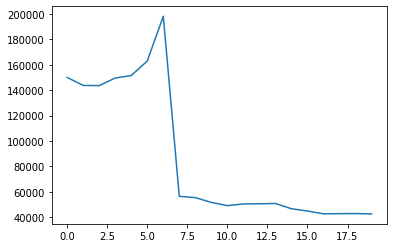

In [142]:
mse = []
for i in range(20):
    ar_model_p0 = AutoReg(model_train_ta_p0_values, lags = i+1).fit()
    pred = ar_model_p0.predict(start=len(model_train_ta_p0_values)-25, end=len(model_train_ta_p0_values)-1)
    true = model_train_ta_p0_values[len(model_train_ta_p0_values)-25:]
    mse.append(mean_squared_error(true,pred))

plt.plot(mse)

In [143]:
ar_model_p0 = AutoReg(model_train_ta_p0_values, lags = 8).fit()
ar_model_p0.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                      y   No. Observations:                 1826
Model:                     AutoReg(8)   Log Likelihood              -11467.777
Method:               Conditional MLE   S.D. of innovations            132.817
Date:                Wed, 26 Jul 2023   AIC                          22955.554
Time:                        15:24:18   BIC                          23010.609
Sample:                             8   HQIC                         22975.867
                                 1826                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         77.9832     22.477      3.470      0.001      33.930     122.037
y.L1           0.8239      0.016     51.192      0.000       0.792       0.855
y.L2           0.0379      0.014      2.700      0.007       0.010       0.065
y.L3          -0.0302      0.014     -2.150      0.032      -0.058      -0.003
y.L4          -0.0270      0.014     -1.916      0.055      -0.055       0.001
y.L5           0.0121      0.014      0.857      0.391      -0.016       0.040
y.L6           0.0030      0.014      0.210      0.834      -0.025       0.031
y.L7           0.8886      0.014     63.254      0.000       0.861       0.916
y.L8          -0.7312      0.016    -45.359      0.000      -0.763      -0.700
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.9135           -0.4385j            1.0133           -0.4288
AR.2           -0.9135           +0.4385j            1.0133            0.4288
AR.3           -0.2334           -0.9965j            1.0235           -0.2866
AR.4           -0.2334           +0.9965j            1.0235            0.2866
AR.5            0.6401           -0.7883j            1.0155           -0.1415
AR.6            0.6401           +0.7883j            1.0155            0.1415
AR.7            1.0207           -0.0000j            1.0207           -0.0000
AR.8            1.2081           -0.0000j            1.2081           -0.0000
-----------------------------------------------------------------------------
"""

In [144]:
pred_p = ar_model_p0.predict(start=len(model_train_ta_p0_values), end=len(model_train_ta_p0_values)+365-1)

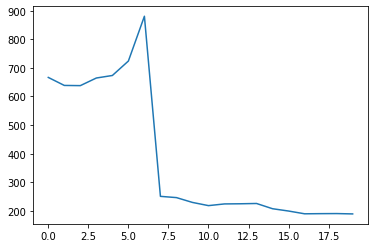

In [145]:
mse = []
for i in range(20):
    ar_model_p0 = AutoReg(model_train_ta_p0_values_mean, lags = i+1).fit()
    pred = ar_model_p0.predict(start=len(model_train_ta_p0_values_mean)-25, end=len(model_train_ta_p0_values_mean)-1)
    true = model_train_ta_p0_values_mean[len(model_train_ta_p0_values_mean)-25:]
    mse.append(mean_squared_error(true,pred))

plt.plot(mse)

In [146]:
ar_model_p0 = AutoReg(model_train_ta_p0_values_mean, lags = 8).fit()
ar_model_p0.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                      y   No. Observations:                 1826
Model:                     AutoReg(8)   Log Likelihood               -6544.542
Method:               Conditional MLE   S.D. of innovations              8.854
Date:                Wed, 26 Jul 2023   AIC                          13109.083
Time:                        15:24:19   BIC                          13164.138
Sample:                             8   HQIC                         13129.396
                                 1826                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.1989      1.498      3.470      0.001       2.262       8.136
y.L1           0.8239      0.016     51.192      0.000       0.792       0.855
y.L2           0.0379      0.014      2.700      0.007       0.010       0.065
y.L3          -0.0302      0.014     -2.150      0.032      -0.058      -0.003
y.L4          -0.0270      0.014     -1.916      0.055      -0.055       0.001
y.L5           0.0121      0.014      0.857      0.391      -0.016       0.040
y.L6           0.0030      0.014      0.210      0.834      -0.025       0.031
y.L7           0.8886      0.014     63.254      0.000       0.861       0.916
y.L8          -0.7312      0.016    -45.359      0.000      -0.763      -0.700
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.9135           -0.4385j            1.0133           -0.4288
AR.2           -0.9135           +0.4385j            1.0133            0.4288
AR.3           -0.2334           -0.9965j            1.0235           -0.2866
AR.4           -0.2334           +0.9965j            1.0235            0.2866
AR.5            0.6401           -0.7883j            1.0155           -0.1415
AR.6            0.6401           +0.7883j            1.0155            0.1415
AR.7            1.0207           -0.0000j            1.0207           -0.0000
AR.8            1.2081           -0.0000j            1.2081           -0.0000
-----------------------------------------------------------------------------
"""

In [147]:
pred_mean = ar_model_p0.predict(start=len(model_train_ta_p0_values_mean), end=len(model_train_ta_p0_values_mean)+365-1)

In [148]:
df = { 'date': model_test_ta_p0.groupby('date').sum().reset_index()['date'],
       'num_sold_product': pred_p}
model_test_ta_p0_pred = pd.DataFrame(df)

In [149]:
df = { 'date': model_test_ta_p0.groupby('date').sum().reset_index()['date'],
       'mean_sold_product': pred_mean}
model_test_ta_p0_pred_mean = pd.DataFrame(df)

In [150]:
model_test_ta_p0 = model_test_ta_p0.merge(model_test_ta_p0_pred)

In [151]:
model_test_ta_p0 = model_test_ta_p0.merge(model_test_ta_p0_pred_mean)

#### AR Model for Product 1

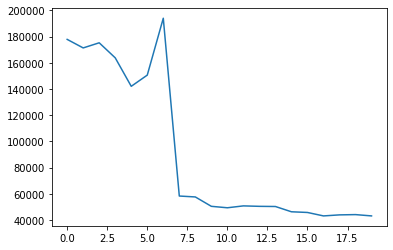

In [152]:
mse = []
for i in range(20):
    ar_model_p1 = AutoReg(model_train_ta_p1_values, lags = i+1).fit()
    pred = ar_model_p1.predict(start=len(model_train_ta_p1_values)-25, end=len(model_train_ta_p1_values)-1)
    true = model_train_ta_p1_values[len(model_train_ta_p1_values)-25:]
    mse.append(mean_squared_error(true,pred))

plt.plot(mse)

In [153]:
ar_model_p1 = AutoReg(model_train_ta_p1_values, lags = 8).fit()
ar_model_p1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                      y   No. Observations:                 1826
Model:                     AutoReg(8)   Log Likelihood              -11411.017
Method:               Conditional MLE   S.D. of innovations            128.734
Date:                Wed, 26 Jul 2023   AIC                          22842.034
Time:                        15:24:19   BIC                          22897.089
Sample:                             8   HQIC                         22862.347
                                 1826                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        207.6438     37.275      5.571      0.000     134.586     280.701
y.L1           0.8125      0.016     50.422      0.000       0.781       0.844
y.L2           0.0348      0.014      2.519      0.012       0.008       0.062
y.L3          -0.0356      0.014     -2.573      0.010      -0.063      -0.008
y.L4          -0.0304      0.014     -2.190      0.029      -0.058      -0.003
y.L5           0.0008      0.014      0.060      0.952      -0.026       0.028
y.L6           0.0042      0.014      0.301      0.763      -0.023       0.031
y.L7           0.8821      0.014     63.789      0.000       0.855       0.909
y.L8          -0.7312      0.016    -45.253      0.000      -0.763      -0.700
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.9142           -0.4374j            1.0134           -0.4290
AR.2           -0.9142           +0.4374j            1.0134            0.4290
AR.3           -0.2342           -0.9952j            1.0224           -0.2868
AR.4           -0.2342           +0.9952j            1.0224            0.2868
AR.5            0.6397           -0.7885j            1.0153           -0.1415
AR.6            0.6397           +0.7885j            1.0153            0.1415
AR.7            1.0847           -0.0000j            1.0847           -0.0000
AR.8            1.1392           -0.0000j            1.1392           -0.0000
-----------------------------------------------------------------------------
"""

In [154]:
pred_p = ar_model_p1.predict(start=len(model_train_ta_p1_values), end=len(model_train_ta_p1_values)+365-1)

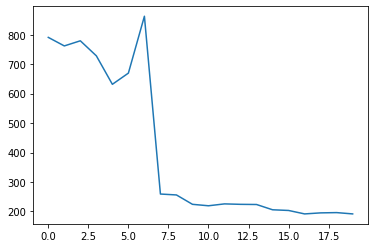

In [155]:
mse = []
for i in range(20):
    ar_model_p1 = AutoReg(model_train_ta_p1_values_mean, lags = i+1).fit()
    pred = ar_model_p1.predict(start=len(model_train_ta_p1_values_mean)-25, end=len(model_train_ta_p1_values_mean)-1)
    true = model_train_ta_p1_values_mean[len(model_train_ta_p1_values_mean)-25:]
    mse.append(mean_squared_error(true,pred))

plt.plot(mse)

In [156]:
ar_model_p1 = AutoReg(model_train_ta_p1_values_mean, lags = 8).fit()
ar_model_p1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                      y   No. Observations:                 1826
Model:                     AutoReg(8)   Log Likelihood               -6487.782
Method:               Conditional MLE   S.D. of innovations              8.582
Date:                Wed, 26 Jul 2023   AIC                          12995.563
Time:                        15:24:19   BIC                          13050.618
Sample:                             8   HQIC                         13015.876
                                 1826                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.8429      2.485      5.571      0.000       8.972      18.713
y.L1           0.8125      0.016     50.422      0.000       0.781       0.844
y.L2           0.0348      0.014      2.519      0.012       0.008       0.062
y.L3          -0.0356      0.014     -2.573      0.010      -0.063      -0.008
y.L4          -0.0304      0.014     -2.190      0.029      -0.058      -0.003
y.L5           0.0008      0.014      0.060      0.952      -0.026       0.028
y.L6           0.0042      0.014      0.301      0.763      -0.023       0.031
y.L7           0.8821      0.014     63.789      0.000       0.855       0.909
y.L8          -0.7312      0.016    -45.253      0.000      -0.763      -0.700
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.9142           -0.4374j            1.0134           -0.4290
AR.2           -0.9142           +0.4374j            1.0134            0.4290
AR.3           -0.2342           -0.9952j            1.0224           -0.2868
AR.4           -0.2342           +0.9952j            1.0224            0.2868
AR.5            0.6397           -0.7885j            1.0153           -0.1415
AR.6            0.6397           +0.7885j            1.0153            0.1415
AR.7            1.0847           -0.0000j            1.0847           -0.0000
AR.8            1.1392           -0.0000j            1.1392           -0.0000
-----------------------------------------------------------------------------
"""

In [157]:
pred_mean = ar_model_p1.predict(start=len(model_train_ta_p1_values_mean), end=len(model_train_ta_p1_values_mean)+365-1)

In [158]:
df = { 'date': model_test_ta_p1.groupby('date').sum().reset_index()['date'],
       'num_sold_product': pred_p}
model_test_ta_p1_pred = pd.DataFrame(df)

In [159]:
df = { 'date': model_test_ta_p1.groupby('date').sum().reset_index()['date'],
       'mean_sold_product': pred_mean}
model_test_ta_p1_pred_mean = pd.DataFrame(df)

In [160]:
model_test_ta_p1 = model_test_ta_p1.merge(model_test_ta_p1_pred)

In [161]:
model_test_ta_p1 = model_test_ta_p1.merge(model_test_ta_p1_pred_mean)

#### AR Model for Product 2

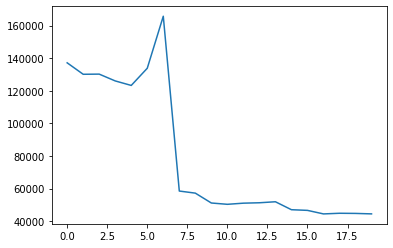

In [162]:
mse = []
for i in range(20):
    ar_model_p2 = AutoReg(model_train_ta_p2_values, lags = i+1).fit()
    pred = ar_model_p2.predict(start=len(model_train_ta_p2_values)-25, end=len(model_train_ta_p2_values)-1)
    true = model_train_ta_p2_values[len(model_train_ta_p2_values)-25:]
    mse.append(mean_squared_error(true,pred))

plt.plot(mse)

In [163]:
ar_model_p2 = AutoReg(model_train_ta_p2_values, lags = 8).fit()
ar_model_p2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                      y   No. Observations:                 1826
Model:                     AutoReg(8)   Log Likelihood              -11257.209
Method:               Conditional MLE   S.D. of innovations            118.291
Date:                Wed, 26 Jul 2023   AIC                          22534.418
Time:                        15:24:20   BIC                          22589.473
Sample:                             8   HQIC                         22554.731
                                 1826                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         70.1501     21.241      3.303      0.001      28.519     111.781
y.L1           0.8274      0.016     51.005      0.000       0.796       0.859
y.L2           0.0376      0.015      2.548      0.011       0.009       0.066
y.L3          -0.0311      0.015     -2.101      0.036      -0.060      -0.002
y.L4          -0.0300      0.015     -2.024      0.043      -0.059      -0.001
y.L5           0.0158      0.015      1.066      0.286      -0.013       0.045
y.L6          -0.0003      0.015     -0.023      0.981      -0.029       0.029
y.L7           0.8750      0.015     59.317      0.000       0.846       0.904
y.L8          -0.7191      0.016    -44.373      0.000      -0.751      -0.687
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.9151           -0.4402j            1.0154           -0.4286
AR.2           -0.9151           +0.4402j            1.0154            0.4286
AR.3           -0.2339           -0.9998j            1.0268           -0.2866
AR.4           -0.2339           +0.9998j            1.0268            0.2866
AR.5            0.6423           -0.7896j            1.0178           -0.1413
AR.6            0.6423           +0.7896j            1.0178            0.1413
AR.7            1.0226           -0.0000j            1.0226           -0.0000
AR.8            1.2076           -0.0000j            1.2076           -0.0000
-----------------------------------------------------------------------------
"""

In [164]:
pred_p = ar_model_p2.predict(start=len(model_train_ta_p2_values), end=len(model_train_ta_p2_values)+365-1)

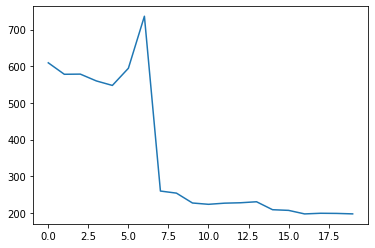

In [165]:
mse = []
for i in range(20):
    ar_model_p2 = AutoReg(model_train_ta_p2_values_mean, lags = i+1).fit()
    pred = ar_model_p2.predict(start=len(model_train_ta_p2_values_mean)-25, end=len(model_train_ta_p2_values_mean)-1)
    true = model_train_ta_p2_values_mean[len(model_train_ta_p2_values_mean)-25:]
    mse.append(mean_squared_error(true,pred))

plt.plot(mse)

In [166]:
ar_model_p2 = AutoReg(model_train_ta_p2_values_mean, lags = 8).fit()
ar_model_p2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                      y   No. Observations:                 1826
Model:                     AutoReg(8)   Log Likelihood               -6333.974
Method:               Conditional MLE   S.D. of innovations              7.886
Date:                Wed, 26 Jul 2023   AIC                          12687.948
Time:                        15:24:20   BIC                          12743.003
Sample:                             8   HQIC                         12708.260
                                 1826                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6767      1.416      3.303      0.001       1.901       7.452
y.L1           0.8274      0.016     51.005      0.000       0.796       0.859
y.L2           0.0376      0.015      2.548      0.011       0.009       0.066
y.L3          -0.0311      0.015     -2.101      0.036      -0.060      -0.002
y.L4          -0.0300      0.015     -2.024      0.043      -0.059      -0.001
y.L5           0.0158      0.015      1.066      0.286      -0.013       0.045
y.L6          -0.0003      0.015     -0.023      0.981      -0.029       0.029
y.L7           0.8750      0.015     59.317      0.000       0.846       0.904
y.L8          -0.7191      0.016    -44.373      0.000      -0.751      -0.687
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.9151           -0.4402j            1.0154           -0.4286
AR.2           -0.9151           +0.4402j            1.0154            0.4286
AR.3           -0.2339           -0.9998j            1.0268           -0.2866
AR.4           -0.2339           +0.9998j            1.0268            0.2866
AR.5            0.6423           -0.7896j            1.0178           -0.1413
AR.6            0.6423           +0.7896j            1.0178            0.1413
AR.7            1.0226           -0.0000j            1.0226           -0.0000
AR.8            1.2076           -0.0000j            1.2076           -0.0000
-----------------------------------------------------------------------------
"""

In [167]:
pred_mean = ar_model_p2.predict(start=len(model_train_ta_p2_values_mean), end=len(model_train_ta_p2_values_mean)+365-1)

In [168]:
df = { 'date': model_test_ta_p2.groupby('date').sum().reset_index()['date'],
       'num_sold_product': pred_p}
model_test_ta_p2_pred = pd.DataFrame(df)

In [169]:
df = { 'date': model_test_ta_p2.groupby('date').sum().reset_index()['date'],
       'mean_sold_product': pred_mean}
model_test_ta_p2_pred_mean = pd.DataFrame(df)

In [170]:
model_test_ta_p2 = model_test_ta_p2.merge(model_test_ta_p2_pred)

In [171]:
model_test_ta_p2 = model_test_ta_p2.merge(model_test_ta_p2_pred_mean)

#### AR Model for Product 3

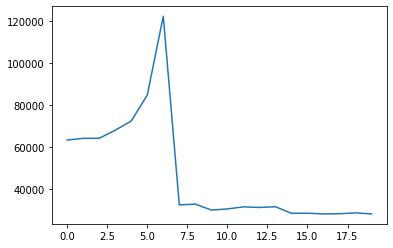

In [172]:
mse = []
for i in range(20):
    ar_model_p3 = AutoReg(model_train_ta_p3_values, lags = i+1).fit()
    pred = ar_model_p3.predict(start=len(model_train_ta_p3_values)-25, end=len(model_train_ta_p3_values)-1)
    true = model_train_ta_p3_values[len(model_train_ta_p3_values)-25:]
    mse.append(mean_squared_error(true,pred))

plt.plot(mse)

In [173]:
ar_model_p3 = AutoReg(model_train_ta_p3_values, lags = 8).fit()
ar_model_p3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                      y   No. Observations:                 1826
Model:                     AutoReg(8)   Log Likelihood              -11056.251
Method:               Conditional MLE   S.D. of innovations            105.912
Date:                Wed, 26 Jul 2023   AIC                          22132.502
Time:                        15:24:21   BIC                          22187.557
Sample:                             8   HQIC                         22152.815
                                 1826                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         47.4077     14.675      3.230      0.001      18.645      76.170
y.L1           0.8172      0.016     50.193      0.000       0.785       0.849
y.L2           0.0508      0.014      3.509      0.000       0.022       0.079
y.L3          -0.0381      0.015     -2.619      0.009      -0.067      -0.010
y.L4          -0.0175      0.015     -1.203      0.229      -0.046       0.011
y.L5           0.0025      0.015      0.172      0.864      -0.026       0.031
y.L6           0.0157      0.015      1.075      0.282      -0.013       0.044
y.L7           0.8737      0.015     60.232      0.000       0.845       0.902
y.L8          -0.7226      0.016    -44.331      0.000      -0.755      -0.691
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.9167           -0.4358j            1.0150           -0.4294
AR.2           -0.9167           +0.4358j            1.0150            0.4294
AR.3           -0.2356           -0.9976j            1.0250           -0.2869
AR.4           -0.2356           +0.9976j            1.0250            0.2869
AR.5            0.6409           -0.7901j            1.0173           -0.1415
AR.6            0.6409           +0.7901j            1.0173            0.1415
AR.7            1.0160           -0.0000j            1.0160           -0.0000
AR.8            1.2159           -0.0000j            1.2159           -0.0000
-----------------------------------------------------------------------------
"""

In [174]:
pred_p = ar_model_p3.predict(start=len(model_train_ta_p3_values), end=len(model_train_ta_p3_values)+365-1)

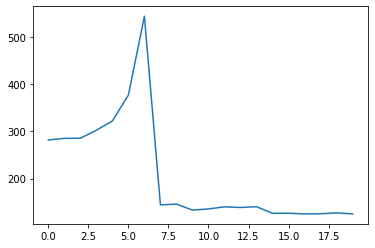

In [175]:
mse = []
for i in range(20):
    ar_model_p3 = AutoReg(model_train_ta_p3_values_mean, lags = i+1).fit()
    pred = ar_model_p3.predict(start=len(model_train_ta_p3_values_mean)-25, end=len(model_train_ta_p3_values_mean)-1)
    true = model_train_ta_p3_values_mean[len(model_train_ta_p3_values_mean)-25:]
    mse.append(mean_squared_error(true,pred))

plt.plot(mse)

In [176]:
ar_model_p3 = AutoReg(model_train_ta_p3_values_mean, lags = 8).fit()
ar_model_p3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                      y   No. Observations:                 1826
Model:                     AutoReg(8)   Log Likelihood               -6133.016
Method:               Conditional MLE   S.D. of innovations              7.061
Date:                Wed, 26 Jul 2023   AIC                          12286.032
Time:                        15:24:21   BIC                          12341.086
Sample:                             8   HQIC                         12306.344
                                 1826                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.1605      0.978      3.230      0.001       1.243       5.078
y.L1           0.8172      0.016     50.193      0.000       0.785       0.849
y.L2           0.0508      0.014      3.509      0.000       0.022       0.079
y.L3          -0.0381      0.015     -2.619      0.009      -0.067      -0.010
y.L4          -0.0175      0.015     -1.203      0.229      -0.046       0.011
y.L5           0.0025      0.015      0.172      0.864      -0.026       0.031
y.L6           0.0157      0.015      1.075      0.282      -0.013       0.044
y.L7           0.8737      0.015     60.232      0.000       0.845       0.902
y.L8          -0.7226      0.016    -44.331      0.000      -0.755      -0.691
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.9167           -0.4358j            1.0150           -0.4294
AR.2           -0.9167           +0.4358j            1.0150            0.4294
AR.3           -0.2356           -0.9976j            1.0250           -0.2869
AR.4           -0.2356           +0.9976j            1.0250            0.2869
AR.5            0.6409           -0.7901j            1.0173           -0.1415
AR.6            0.6409           +0.7901j            1.0173            0.1415
AR.7            1.0160           -0.0000j            1.0160           -0.0000
AR.8            1.2159           -0.0000j            1.2159           -0.0000
-----------------------------------------------------------------------------
"""

In [177]:
pred_mean = ar_model_p3.predict(start=len(model_train_ta_p3_values_mean), end=len(model_train_ta_p3_values_mean)+365-1)

In [178]:
df = { 'date': model_test_ta_p3.groupby('date').sum().reset_index()['date'],
       'num_sold_product': pred_p}
model_test_ta_p3_pred = pd.DataFrame(df)

In [179]:
df = { 'date': model_test_ta_p3.groupby('date').sum().reset_index()['date'],
       'mean_sold_product': pred_mean}
model_test_ta_p3_pred_mean = pd.DataFrame(df)

In [180]:
model_test_ta_p3 = model_test_ta_p3.merge(model_test_ta_p3_pred)

In [181]:
model_test_ta_p3 = model_test_ta_p3.merge(model_test_ta_p3_pred_mean)

#### AR Model for Product 4

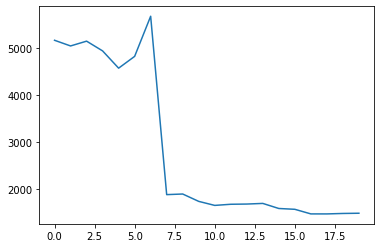

In [182]:
mse = []
for i in range(20):
    ar_model_p4 = AutoReg(model_train_ta_p4_values, lags = i+1).fit()
    pred = ar_model_p4.predict(start=len(model_train_ta_p4_values)-25, end=len(model_train_ta_p4_values)-1)
    true = model_train_ta_p4_values[len(model_train_ta_p4_values)-25:]
    mse.append(mean_squared_error(true,pred))

plt.plot(mse)

In [183]:
ar_model_p4 = AutoReg(model_train_ta_p4_values, lags = 17).fit()
ar_model_p4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                      y   No. Observations:                 1826
Model:                    AutoReg(17)   Log Likelihood               -7814.027
Method:               Conditional MLE   S.D. of innovations             18.185
Date:                Wed, 26 Jul 2023   AIC                          15666.055
Time:                        15:24:21   BIC                          15770.565
Sample:                            17   HQIC                         15704.624
                                 1826                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.5035      5.735      2.354      0.019       2.262      24.745
y.L1           0.8080      0.023     34.817      0.000       0.763       0.854
y.L2           0.1938      0.030      6.480      0.000       0.135       0.252
y.L3          -0.1175      0.029     -4.051      0.000      -0.174      -0.061
y.L4          -0.0941      0.027     -3.466      0.001      -0.147      -0.041
y.L5          -0.0504      0.027     -1.850      0.064      -0.104       0.003
y.L6           0.0452      0.027      1.658      0.097      -0.008       0.099
y.L7           0.5005      0.027     18.464      0.000       0.447       0.554
y.L8          -0.3712      0.030    -12.578      0.000      -0.429      -0.313
y.L9          -0.0954      0.031     -3.109      0.002      -0.155      -0.035
y.L10         -0.0553      0.030     -1.868      0.062      -0.113       0.003
y.L11          0.0913      0.027      3.362      0.001       0.038       0.145
y.L12          0.0454      0.027      1.669      0.095      -0.008       0.099
y.L13         -0.0451      0.027     -1.658      0.097      -0.098       0.008
y.L14          0.4419      0.027     16.316      0.000       0.389       0.495
y.L15         -0.3908      0.029    -13.532      0.000      -0.447      -0.334
y.L16         -0.0944      0.030     -3.154      0.002      -0.153      -0.036
y.L17          0.1621      0.024      6.893      0.000       0.116       0.208
                                    Roots                                     
==============================================================================
                   Real          Imaginary           Modulus         Frequency
------------------------------------------------------------------------------
AR.1            -0.2233           -0.9801j            1.0052           -0.2856
AR.2            -0.2233           +0.9801j            1.0052            0.2856
AR.3            -0.6573           -0.8557j            1.0790           -0.3542
AR.4            -0.6573           +0.8557j            1.0790            0.3542
AR.5            -0.9063           -0.4367j            1.0060           -0.4285
AR.6            -0.9063           +0.4367j            1.0060            0.4285
AR.7            -1.1511           -0.0000j            1.1511           -0.5000
AR.8            -1.7264           -0.0000j            1.7264           -0.5000
AR.9             0.2057           -1.1008j            1.1199           -0.2206
AR.10            0.2057           +1.1008j            1.1199            0.2206
AR.11            0.6265           -0.7862j            1.0053           -0.1429
AR.12            0.6265           +0.7862j            1.0053            0.1429
AR.13            1.0116           -0.0000j            1.0116           -0.0000
AR.14            1.0738           -0.5883j            1.2244           -0.0798
AR.15            1.0738           +0.5883j            1.2244            0.0798
AR.16            1.1049           -0.3685j            1.1648           -0.0512
AR

In [184]:
pred_p = ar_model_p4.predict(start=len(model_train_ta_p4_values), end=len(model_train_ta_p4_values)+365-1)

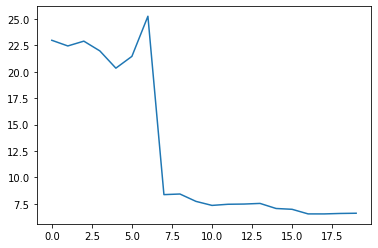

In [185]:
mse = []
for i in range(20):
    ar_model_p4 = AutoReg(model_train_ta_p4_values_mean, lags = i+1).fit()
    pred = ar_model_p4.predict(start=len(model_train_ta_p4_values_mean)-25, end=len(model_train_ta_p4_values_mean)-1)
    true = model_train_ta_p4_values_mean[len(model_train_ta_p4_values_mean)-25:]
    mse.append(mean_squared_error(true,pred))

plt.plot(mse)

In [186]:
ar_model_p4 = AutoReg(model_train_ta_p4_values_mean, lags = 8).fit()
ar_model_p4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                      y   No. Observations:                 1826
Model:                     AutoReg(8)   Log Likelihood               -3194.598
Method:               Conditional MLE   S.D. of innovations              1.403
Date:                Wed, 26 Jul 2023   AIC                           6409.196
Time:                        15:24:22   BIC                           6464.251
Sample:                             8   HQIC                          6429.509
                                 1826                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4059      0.410      5.866      0.000       1.602       3.210
y.L1           0.8104      0.016     49.510      0.000       0.778       0.842
y.L2           0.0296      0.014      2.070      0.038       0.002       0.058
y.L3          -0.0319      0.014     -2.224      0.026      -0.060      -0.004
y.L4          -0.0285      0.014     -1.980      0.048      -0.057      -0.000
y.L5          -0.0026      0.014     -0.182      0.855      -0.031       0.026
y.L6           0.0054      0.014      0.372      0.710      -0.023       0.034
y.L7           0.8729      0.014     60.737      0.000       0.845       0.901
y.L8          -0.7255      0.016    -43.998      0.000      -0.758      -0.693
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.9159           -0.4382j            1.0153           -0.4290
AR.2           -0.9159           +0.4382j            1.0153            0.4290
AR.3           -0.2341           -0.9954j            1.0226           -0.2868
AR.4           -0.2341           +0.9954j            1.0226            0.2868
AR.5            0.6395           -0.7903j            1.0166           -0.1417
AR.6            0.6395           +0.7903j            1.0166            0.1417
AR.7            1.1121           -0.0256j            1.1123           -0.0037
AR.8            1.1121           +0.0256j            1.1123            0.0037
-----------------------------------------------------------------------------
"""

In [187]:
pred_mean = ar_model_p4.predict(start=len(model_train_ta_p4_values_mean), end=len(model_train_ta_p4_values_mean)+365-1)

In [188]:
df = { 'date': model_test_ta_p4.groupby('date').sum().reset_index()['date'],
       'num_sold_product': pred_p}
model_test_ta_p4_pred = pd.DataFrame(df)

In [189]:
df = { 'date': model_test_ta_p4.groupby('date').sum().reset_index()['date'],
       'mean_sold_product': pred_mean}
model_test_ta_p4_pred_mean = pd.DataFrame(df)

In [190]:
model_test_ta_p4 = model_test_ta_p4.merge(model_test_ta_p4_pred)

In [191]:
model_test_ta_p4 = model_test_ta_p4.merge(model_test_ta_p4_pred_mean)

#### AR Model Predictions Merge

In [192]:
model_test_ta_final = pd.concat([model_test_ta_c0,model_test_ta_c1])
model_test_ta_final = pd.concat([model_test_ta_final,model_test_ta_c2])
model_test_ta_final = pd.concat([model_test_ta_final,model_test_ta_c3])
model_test_ta_final = pd.concat([model_test_ta_final,model_test_ta_c4])
model_test_ta_final = model_test_ta.merge(model_test_ta_final)

In [193]:
model_test_ta_store = pd.concat([model_test_ta_s0,model_test_ta_s1])
model_test_ta_store = pd.concat([model_test_ta_store,model_test_ta_s2])
model_test_ta_final = model_test_ta_final.merge(model_test_ta_store)

In [194]:
model_test_ta_product = pd.concat([model_test_ta_p0,model_test_ta_p1])
model_test_ta_product = pd.concat([model_test_ta_product,model_test_ta_p2])
model_test_ta_product = pd.concat([model_test_ta_product,model_test_ta_p3])
model_test_ta_product = pd.concat([model_test_ta_product,model_test_ta_p4])
model_test_ta_final = model_test_ta_final.merge(model_test_ta_product)

In [195]:
train_sold_total = model_train_ta[['date','country','num_sold']].groupby(['date','country']).sum().reset_index()
train_sold_total['num_sold_country'] = train_sold_total['num_sold']
train_sold_total = train_sold_total.drop('num_sold',axis=1)

model_train_ta = model_train_ta.merge(train_sold_total)

In [196]:
train_sold_country_mean = model_train_ta[['date','country','num_sold']].groupby(['date','country']).mean().reset_index()
train_sold_country_mean['mean_sold_country'] = train_sold_country_mean['num_sold']
train_sold_country_mean = train_sold_country_mean.drop('num_sold',axis=1)

model_train_ta = model_train_ta.merge(train_sold_country_mean)

In [197]:
train_sold_store = model_train_ta[['date','store','num_sold']].groupby(['date','store']).sum().reset_index()
train_sold_store['num_sold_store'] = train_sold_store['num_sold']
train_sold_store = train_sold_store.drop('num_sold',axis=1)

model_train_ta = model_train_ta.merge(train_sold_store)

In [198]:
train_sold_store_mean = model_train_ta[['date','store','num_sold']].groupby(['date','store']).mean().reset_index()
train_sold_store_mean['mean_sold_store'] = train_sold_store_mean['num_sold']
train_sold_store_mean = train_sold_store_mean.drop('num_sold',axis=1)

model_train_ta = model_train_ta.merge(train_sold_store_mean)

In [199]:
train_sold_product = model_train_ta[['date','product','num_sold']].groupby(['date','product']).sum().reset_index()
train_sold_product['num_sold_product'] = train_sold_product['num_sold']
train_sold_product = train_sold_product.drop('num_sold',axis=1)

model_train_ta = model_train_ta.merge(train_sold_product)

In [200]:
train_sold_product_mean = model_train_ta[['date','product','num_sold']].groupby(['date','product']).mean().reset_index()
train_sold_product_mean['mean_sold_product'] = train_sold_product_mean['num_sold']
train_sold_product_mean = train_sold_product_mean.drop('num_sold',axis=1)

model_train_ta = model_train_ta.merge(train_sold_product_mean)

### Correlation Plot

C:\Users\User\AppData\Local\Temp\ipykernel_21604\607541286.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool),


<Axes: >

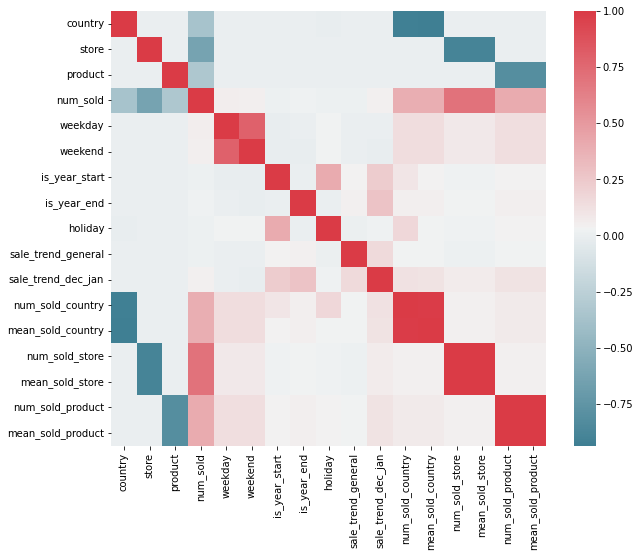

In [201]:
import seaborn as sns

f, ax = plt.subplots(figsize=(10, 8))
corr = model_train_ta.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool),
            cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

### PCA Dimensionality Reduction

In [202]:
from sklearn.preprocessing import StandardScaler  # to standardize the features
from sklearn.decomposition import PCA  # to apply PCA

scalar = StandardScaler()
scaled_data = pd.DataFrame(scalar.fit_transform(model_train_ta.drop(['date','num_sold'],axis=1))) #scaling the data

<Axes: >

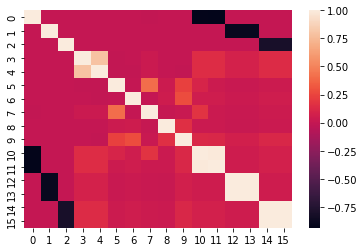

In [203]:
sns.heatmap(scaled_data.corr())

In [204]:
pca = PCA(n_components = 6)
pca.fit(scaled_data)
data_pca = pca.transform(scaled_data)
data_pca = pd.DataFrame(data_pca,columns=['PC1','PC2','PC3','PC4','PC5','PC6'])

In [205]:
scaled_test_data = pd.DataFrame(scalar.fit_transform(model_test_ta_final.drop(['date'],axis=1)))
pca.fit(scaled_test_data)
data_test_pca = pca.transform(scaled_test_data)
data_test_pca = pd.DataFrame(data_test_pca,columns=['PC1','PC2','PC3','PC4','PC5','PC6'])

## Correlation Between Features

### Country - Num Sold

In [206]:
num_sold_anova_sqrt = np.sqrt(model_train_ta['num_sold'])

In [207]:
import statsmodels.api as sm
from statsmodels.formula.api import ols


df = pd.DataFrame({'y':num_sold_anova_sqrt, 'x':model_train_ta['country']})
mod = ols('y~x', data=df).fit()

aov_table = sm.stats.anova_lm(mod, typ=2)

print(aov_table)

                sum_sq        df             F  PR(>F)
x         8.638409e+05       1.0  26043.075197     0.0
Residual  4.542523e+06  136948.0           NaN     NaN


### Store - Num Sold

In [208]:
df = pd.DataFrame({'y':num_sold_anova_sqrt, 'x':model_train_ta['store']})
mod = ols('y~x', data=df).fit()

aov_table = sm.stats.anova_lm(mod, typ=2)

print(aov_table)

                sum_sq        df              F  PR(>F)
x         2.323845e+06       1.0  103242.183026     0.0
Residual  3.082519e+06  136948.0            NaN     NaN


### Product - Num Sold

In [209]:
df = pd.DataFrame({'y':num_sold_anova_sqrt, 'x':model_train_ta['product']})
mod = ols('y~x', data=df).fit()

aov_table = sm.stats.anova_lm(mod, typ=2)

print(aov_table)

                sum_sq        df             F  PR(>F)
x         8.944133e+05       1.0  27147.482096     0.0
Residual  4.511951e+06  136948.0           NaN     NaN


### Country - Product

In [210]:
crosstab = pd.crosstab( model_train_ta['country'],
                        model_train_ta['product'])
crosstab

product,0,1,2,3,4
country,,,,,
0,5474,5475,5475,5475,5475
1,5484,5483,5483,5483,5483
2,5485,5485,5485,5485,5485
3,5475,5475,5475,5475,5475
4,5472,5472,5472,5472,5472


In [211]:
from scipy.stats import chi2_contingency
chi_square_result = chi2_contingency(crosstab)
chi_square_result

(0.000292024263586654,
 1.0,
 16,
 array([[5474.8, 5474.8, 5474.8, 5474.8, 5474.8],
        [5483.2, 5483.2, 5483.2, 5483.2, 5483.2],
        [5485. , 5485. , 5485. , 5485. , 5485. ],
        [5475. , 5475. , 5475. , 5475. , 5475. ],
        [5472. , 5472. , 5472. , 5472. , 5472. ]]))

Meaningless

### Country - Store

In [212]:
crosstab = pd.crosstab( model_train_ta['country'],
                        model_train_ta['store'])
crosstab

store,0,1,2
country,,,
0,9125,9125,9124
1,9140,9140,9136
2,9140,9140,9145
3,9125,9125,9125
4,9120,9120,9120


In [213]:
chi_square_result = chi2_contingency(crosstab)
chi_square_result

(0.003063417720263248,
 0.999999999999771,
 8,
 array([[9124.66666667, 9124.66666667, 9124.66666667],
        [9138.66666667, 9138.66666667, 9138.66666667],
        [9141.66666667, 9141.66666667, 9141.66666667],
        [9125.        , 9125.        , 9125.        ],
        [9120.        , 9120.        , 9120.        ]]))

Meaningless

### Store - Product

In [214]:
crosstab = pd.crosstab( model_train_ta['product'],
                        model_train_ta['store'])
crosstab

store,0,1,2
product,,,
0,9130,9130,9130
1,9130,9130,9130
2,9130,9130,9130
3,9130,9130,9130
4,9130,9130,9130


In [215]:
chi_square_result = chi2_contingency(crosstab)
chi_square_result

(0.0,
 1.0,
 8,
 array([[9130., 9130., 9130.],
        [9130., 9130., 9130.],
        [9130., 9130., 9130.],
        [9130., 9130., 9130.],
        [9130., 9130., 9130.]]))

Meaningless

### Mean,Num Sold Country - Num Sold

In [216]:
from scipy.stats import pearsonr

x = np.array(model_train_ta['num_sold_country'])
y = np.array(model_train_ta['num_sold'])

nas = np.logical_or(np.isnan(x), np.isnan(y))
coef, p = pearsonr(x[~nas], y[~nas])

print(coef, p)

0.38825186477005347 0.0


In [217]:
x = np.array(model_train_ta['mean_sold_country'])
y = np.array(model_train_ta['num_sold'])

nas = np.logical_or(np.isnan(x), np.isnan(y))
coef, p = pearsonr(x[~nas], y[~nas])

print(coef, p)

0.39281132832814636 0.0


In [218]:
x = np.array(model_train_ta['mean_sold_country'])
y = np.array(model_train_ta['num_sold_country'])

nas = np.logical_or(np.isnan(x), np.isnan(y))
coef, p = pearsonr(x[~nas], y[~nas])

print(coef, p)

0.9883927391363698 0.0


Drop one of them

### Mean,Num Sold Store - Num Sold

In [219]:
x = np.array(model_train_ta['num_sold_store'])
y = np.array(model_train_ta['num_sold'])

nas = np.logical_or(np.isnan(x), np.isnan(y))
coef, p = pearsonr(x[~nas], y[~nas])

print(coef, p)

0.7003606654177243 0.0


In [220]:
x = np.array(model_train_ta['mean_sold_store'])
y = np.array(model_train_ta['num_sold'])

nas = np.logical_or(np.isnan(x), np.isnan(y))
coef, p = pearsonr(x[~nas], y[~nas])

print(coef, p)

0.7003606654177326 0.0


In [221]:
x = np.array(model_train_ta['mean_sold_store'])
y = np.array(model_train_ta['num_sold_store'])

nas = np.logical_or(np.isnan(x), np.isnan(y))
coef, p = pearsonr(x[~nas], y[~nas])

print(coef, p)

1.0 0.0


Drop one of them

### Mean, Num Sold Product - Num Sold

In [222]:
x = np.array(model_train_ta['num_sold_product'])
y = np.array(model_train_ta['num_sold'])

nas = np.logical_or(np.isnan(x), np.isnan(y))
coef, p = pearsonr(x[~nas], y[~nas])

print(coef, p)

0.4033641775254 0.0


In [223]:
x = np.array(model_train_ta['mean_sold_product'])
y = np.array(model_train_ta['num_sold'])

nas = np.logical_or(np.isnan(x), np.isnan(y))
coef, p = pearsonr(x[~nas], y[~nas])

print(coef, p)

0.40336417752540304 0.0


In [224]:
x = np.array(model_train_ta['mean_sold_product'])
y = np.array(model_train_ta['num_sold_product'])

nas = np.logical_or(np.isnan(x), np.isnan(y))
coef, p = pearsonr(x[~nas], y[~nas])

print(coef, p)

0.9999999999999948 0.0


Drop one of them

### Mean Sold Country, Store, Product

In [225]:
x = np.array(model_train_ta['mean_sold_country'])
y = np.array(model_train_ta['mean_sold_product'])

nas = np.logical_or(np.isnan(x), np.isnan(y))
coef, p = pearsonr(x[~nas], y[~nas])

print(coef, p)

0.07202725705662713 6.252624617212656e-157


In [226]:
x = np.array(model_train_ta['mean_sold_country'])
y = np.array(model_train_ta['mean_sold_store'])

nas = np.logical_or(np.isnan(x), np.isnan(y))
coef, p = pearsonr(x[~nas], y[~nas])

print(coef, p)

0.04158230665022088 1.7742566219403016e-53


In [227]:
x = np.array(model_train_ta['mean_sold_product'])
y = np.array(model_train_ta['mean_sold_store'])

nas = np.logical_or(np.isnan(x), np.isnan(y))
coef, p = pearsonr(x[~nas], y[~nas])

print(coef, p)

0.040406093282332446 1.3614397955444393e-50


Take all three of them

### Mean Solds - Country, Store, Product

In [228]:
mean_soldc_anova_sqrt = np.sqrt(model_train_ta['mean_sold_country'])

In [229]:
df = pd.DataFrame({'y':mean_soldc_anova_sqrt, 'x':model_train_ta['country']})
mod = ols('y~x', data=df).fit()

aov_table = sm.stats.anova_lm(mod, typ=2)

print(aov_table)

                sum_sq        df              F  PR(>F)
x         1.068753e+06       1.0  941732.098044     0.0
Residual  1.554195e+05  136948.0            NaN     NaN


Mean sold country - country are related.

In [230]:
mean_solds_anova_sqrt = np.sqrt(model_train_ta['mean_sold_store'])

In [231]:
df = pd.DataFrame({'y':mean_solds_anova_sqrt, 'x':model_train_ta['store']})
mod = ols('y~x', data=df).fit()

aov_table = sm.stats.anova_lm(mod, typ=2)

print(aov_table)

                sum_sq        df              F  PR(>F)
x         2.630005e+06       1.0  803057.327391     0.0
Residual  4.485034e+05  136948.0            NaN     NaN


Mean sold store - store are related.

In [232]:
mean_soldp_anova_sqrt = np.sqrt(model_train_ta['mean_sold_product'])

In [233]:
df = pd.DataFrame({'y':mean_soldp_anova_sqrt, 'x':model_train_ta['product']})
mod = ols('y~x', data=df).fit()

aov_table = sm.stats.anova_lm(mod, typ=2)

print(aov_table)

                sum_sq        df              F  PR(>F)
x         1.082862e+06       1.0  249408.552602     0.0
Residual  5.945895e+05  136948.0            NaN     NaN


Mean sold product - product are related.

In [234]:
df = pd.DataFrame({'y':mean_soldc_anova_sqrt, 'x':model_train_ta['store']})
mod = ols('y~x', data=df).fit()

aov_table = sm.stats.anova_lm(mod, typ=2)

print(aov_table)

                sum_sq        df         F    PR(>F)
x         5.132261e-03       1.0  0.000574  0.980883
Residual  1.224172e+06  136948.0       NaN       NaN


In [235]:
df = pd.DataFrame({'y':mean_soldc_anova_sqrt, 'x':model_train_ta['product']})
mod = ols('y~x', data=df).fit()

aov_table = sm.stats.anova_lm(mod, typ=2)

print(aov_table)

                sum_sq        df         F    PR(>F)
x         4.078046e-04       1.0  0.000046  0.994611
Residual  1.224172e+06  136948.0       NaN       NaN


In [236]:
df = pd.DataFrame({'y':mean_solds_anova_sqrt, 'x':model_train_ta['country']})
mod = ols('y~x', data=df).fit()

aov_table = sm.stats.anova_lm(mod, typ=2)

print(aov_table)

                sum_sq        df         F    PR(>F)
x         1.171477e-01       1.0  0.005211  0.942451
Residual  3.078508e+06  136948.0       NaN       NaN


In [237]:
df = pd.DataFrame({'y':mean_solds_anova_sqrt, 'x':model_train_ta['product']})
mod = ols('y~x', data=df).fit()

aov_table = sm.stats.anova_lm(mod, typ=2)

print(aov_table)

                sum_sq        df             F  PR(>F)
x         6.140150e-26       1.0  2.731457e-27     1.0
Residual  3.078508e+06  136948.0           NaN     NaN


In [238]:
df = pd.DataFrame({'y':mean_soldp_anova_sqrt, 'x':model_train_ta['country']})
mod = ols('y~x', data=df).fit()

aov_table = sm.stats.anova_lm(mod, typ=2)

print(aov_table)

                sum_sq        df         F    PR(>F)
x         8.163955e-02       1.0  0.006665  0.934933
Residual  1.677451e+06  136948.0       NaN       NaN


In [239]:
df = pd.DataFrame({'y':mean_soldp_anova_sqrt, 'x':model_train_ta['store']})
mod = ols('y~x', data=df).fit()

aov_table = sm.stats.anova_lm(mod, typ=2)

print(aov_table)

                sum_sq        df             F  PR(>F)
x         1.008213e-28       1.0  8.231105e-30     1.0
Residual  1.677451e+06  136948.0           NaN     NaN


As a result, we  should choose either one of each couples of mean solds and categoricals

### Weekday - Weekend - Holiday - Sale_Trends - Year Starts and Ends

In [240]:
df = pd.DataFrame({'y':num_sold_anova_sqrt, 'x':model_train_ta['weekday']})
mod = ols('y~x', data=df).fit()

aov_table = sm.stats.anova_lm(mod, typ=2)

print(aov_table)

                sum_sq        df           F        PR(>F)
x         1.560553e+04       1.0  396.446201  4.360668e-88
Residual  5.390759e+06  136948.0         NaN           NaN


In [241]:
df = pd.DataFrame({'y':num_sold_anova_sqrt, 'x':model_train_ta['weekend']})
mod = ols('y~x', data=df).fit()

aov_table = sm.stats.anova_lm(mod, typ=2)

print(aov_table)

                sum_sq        df           F        PR(>F)
x         1.535369e+04       1.0  390.030341  1.077123e-86
Residual  5.391011e+06  136948.0         NaN           NaN


In [242]:
df = pd.DataFrame({'y':num_sold_anova_sqrt, 'x':model_train_ta['holiday']})
mod = ols('y~x', data=df).fit()

aov_table = sm.stats.anova_lm(mod, typ=2)

print(aov_table)

                sum_sq        df          F    PR(>F)
x         4.676024e+02       1.0  11.845809  0.000578
Residual  5.405897e+06  136948.0        NaN       NaN


In [243]:
df = pd.DataFrame({'y':num_sold_anova_sqrt, 'x':model_train_ta['sale_trend_general']})
mod = ols('y~x', data=df).fit()

aov_table = sm.stats.anova_lm(mod, typ=2)

print(aov_table)

                sum_sq        df          F    PR(>F)
x         5.230644e+02       1.0  13.250968  0.000273
Residual  5.405841e+06  136948.0        NaN       NaN


In [244]:
df = pd.DataFrame({'y':num_sold_anova_sqrt, 'x':model_train_ta['sale_trend_dec_jan']})
mod = ols('y~x', data=df).fit()

aov_table = sm.stats.anova_lm(mod, typ=2)

print(aov_table)

                sum_sq        df           F        PR(>F)
x         9.588490e+03       1.0  243.316483  8.295648e-55
Residual  5.396776e+06  136948.0         NaN           NaN


In [245]:
crosstab = pd.crosstab( model_train_ta['sale_trend_general'],
                        model_train_ta['sale_trend_dec_jan'])
print(crosstab)
chi_square_result = chi2_contingency(crosstab)
print(chi_square_result)

sale_trend_dec_jan      0     1
sale_trend_general             
0                   55604     0
1                   76545  4801
(3399.2011778040433, 0.0, 1, array([[53654.71336984,  1949.28663016],
       [78494.28663016,  2851.71336984]]))


Choose sale_trend_dec_jan over sale_trend_general

In [246]:
crosstab = pd.crosstab( model_train_ta['weekday'],
                        model_train_ta['weekend'])
chi_square_result = chi2_contingency(crosstab)
chi_square_result

(136950.0,
 0.0,
 6,
 array([[13989.80010953,  5585.19989047],
        [13989.80010953,  5585.19989047],
        [13989.80010953,  5585.19989047],
        [13989.80010953,  5585.19989047],
        [13989.80010953,  5585.19989047],
        [13936.19934283,  5563.80065717],
        [13989.80010953,  5585.19989047]]))

I can choose either weekday or weekend but not both at the same time. Will try both cases.

In [247]:
crosstab = pd.crosstab( model_train_ta['weekday'],
                        model_train_ta['holiday'])
chi_square_result = chi2_contingency(crosstab)
chi_square_result

(361.37713121947587,
 5.566617307029536e-75,
 6,
 array([[1.95619929e+04, 1.30071194e+01],
        [1.95619929e+04, 1.30071194e+01],
        [1.95619929e+04, 1.30071194e+01],
        [1.95619929e+04, 1.30071194e+01],
        [1.95619929e+04, 1.30071194e+01],
        [1.94870427e+04, 1.29572837e+01],
        [1.95619929e+04, 1.30071194e+01]]))

In [248]:
crosstab = pd.crosstab( model_train_ta['weekend'],
                        model_train_ta['holiday'])
chi_square_result = chi2_contingency(crosstab)
chi_square_result

(127.03440095730923,
 1.8258109358854533e-29,
 1,
 array([[9.78099644e+04, 6.50355969e+01],
        [3.90490356e+04, 2.59644031e+01]]))

Holiday can be used separately.

In [249]:
df = pd.DataFrame({'y':num_sold_anova_sqrt, 'x':model_train_ta['is_year_start']})
mod = ols('y~x', data=df).fit()

aov_table = sm.stats.anova_lm(mod, typ=2)

print(aov_table)

                sum_sq        df          F        PR(>F)
x         1.014030e+03       1.0  25.691104  4.011898e-07
Residual  5.405350e+06  136948.0        NaN           NaN


In [250]:
df = pd.DataFrame({'y':num_sold_anova_sqrt, 'x':model_train_ta['is_year_end']})
mod = ols('y~x', data=df).fit()

aov_table = sm.stats.anova_lm(mod, typ=2)

print(aov_table)

                sum_sq        df          F        PR(>F)
x         1.794666e+03       1.0  45.475582  1.551636e-11
Residual  5.404570e+06  136948.0        NaN           NaN


In [251]:
x = np.array(model_train_ta['weekend'])
y = np.array(model_train_ta['num_sold'])

nas = np.logical_or(np.isnan(x), np.isnan(y))
coef, p = pearsonr(x[~nas], y[~nas])

print(coef, p)

0.054316243589907054 5.416044485936186e-90


### Final Decisions After Correlation Analysis

In [332]:
model_train_cor = model_train_ta[['weekday','holiday','sale_trend_dec_jan','country','mean_sold_country','store','num_sold_product','num_sold']]
model_test_cor = model_test_ta_final[['weekday','holiday','sale_trend_dec_jan','country','mean_sold_country','store','num_sold_product']]

## REFERENCE MODEL WITH OLS

In [333]:
y = model_train_cor['num_sold']
X = model_train_cor.drop(['num_sold'], axis=1)
model_test_ = model_test_cor
import statsmodels.api as sm

model = sm.OLS(y, X).fit()
summary = model.summary()
print(summary)

                                 OLS Regression Results                                
Dep. Variable:               num_sold   R-squared (uncentered):                   0.831
Model:                            OLS   Adj. R-squared (uncentered):              0.831
Method:                 Least Squares   F-statistic:                          9.648e+04
Date:                Wed, 26 Jul 2023   Prob (F-statistic):                        0.00
Time:                        17:08:24   Log-Likelihood:                     -8.2707e+05
No. Observations:              136950   AIC:                                  1.654e+06
Df Residuals:                  136943   BIC:                                  1.654e+06
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------

## Random Forest

In [334]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [322]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
rf = RandomForestRegressor(random_state=0)

In [335]:
rf = rf.fit(X_train,y_train)
val_pred = rf.predict(X_test)
mean_squared_error(y_test, val_pred)

223.74809609390667

In [336]:
final_rf = rf.fit(X,y)
predictions = final_rf.predict(model_test_)

## XGB

In [258]:
import xgboost
from xgboost import XGBRegressor
params = {'scale_pos_weight':150,
          'learning_rate':0.02,
          'n_estimators': 1200,
#           'max_leaves':2, 
#           'objective':'binary:logistic',
#           'gamma':0.5,
          'subsample':0.8,
          'colsample_bytree':0.6,
          'max_depth':10,
          'min_child_weight':8,
          'random_state': 58
#           'colsample_bylevel':1,
#           'reg_alpha':0, 'reg_lambda':1, , 'max_leaves':250
         }
model = XGBRegressor(**params)

In [259]:
# K = 5
# kf = StratifiedKFold(n_splits = K, random_state = 42, shuffle = True)
# models = []
# msescore_list = []
# for i, (train_index, test_index) in enumerate(kf.split(X,y)):
#     print(train_index)
#     y_train, y_valid = y.iloc[train_index], y.iloc[test_index]
#     X_train, X_valid = X.iloc[train_index,:], X.iloc[test_index,:]
#     print( "\nFold ", i)
    
#     fit_model = model.fit(X_train, y_train)
#     preds = fit_model.predict(X_valid)
#     models.append(fit_model)
    
#     mse = mean_squared_error(y_valid, preds)
#     msescore_list.append(mse)
    
#     print(mse)
    
# print('CV score: ', sum(msescore_list)/len(msescore_list))

In [260]:
# final_model = model.fit(X,y)
# predictions = final_model.predict(model_test_)

## CatBoost

In [287]:
from tqdm import tqdm
from catboost import CatBoostRegressor

mse_errs = []
mae_errs = []

models = []

skf = RepeatedStratifiedKFold(n_splits=5, n_repeats=1, random_state=925)
cv_splits = list(skf.split(X, y))

for split_train, split_val in tqdm(cv_splits):
    split_train = X.index[split_train]
    split_val = X.index[split_val]
    
    X_train, y_train = X.loc[split_train], y.loc[split_train]
    X_val, y_val = X.loc[split_val], y.loc[split_val]
    print("Train shape:", X_train.shape, "|", "Val Shape:", X_val.shape)
    
    
    model = CatBoostRegressor(
        **{'learning_rate': 0.01,
           'depth': 2,
           'iterations': 50000,
           'use_best_model': True,
           'loss_function':'RMSE',
           'random_state': 986,
           'allow_writing_files': False,
           'thread_count': 12
          },
        early_stopping_rounds=2500,
    )
    
    model.fit(
        X_train,
        y_train,
        eval_set=(X_val, y_val),
        verbose=1500,
    )
    
    preds = model.predict(X_val)
    
    mse_err = mean_squared_error(y_val, preds,squared=False)
    print("Fold MSE: ", mse_err)
    mse_errs.append(mse_err)

    mae_err = mean_absolute_error(y_val, preds)
    print("Fold MAE: ", mae_err)
    mae_errs.append(mae_err)
    
    models.append(model)
    
    print("\n", "*"*70, "\n")

C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\model_selection\_split.py:676: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=5.

  0%|          | 0/5 [00:00<?, ?it/s]

Train shape: (109560, 16) | Val Shape: (27390, 16)
0:	learn: 182.4930720	test: 182.3644082	best: 182.3644082 (0)	total: 8.88ms	remaining: 7m 24s
1500:	learn: 33.9077405	test: 34.0378907	best: 34.0378907 (1500)	total: 10.7s	remaining: 5m 44s
3000:	learn: 29.0078006	test: 29.4021976	best: 29.4021976 (3000)	total: 18.9s	remaining: 4m 56s
4500:	learn: 27.6025837	test: 28.1061492	best: 28.1061492 (4500)	total: 27.2s	remaining: 4m 34s
6000:	learn: 26.9753326	test: 27.5308627	best: 27.5308627 (6000)	total: 36.8s	remaining: 4m 29s
7500:	learn: 26.6407052	test: 27.2428770	best: 27.2428770 (7500)	total: 46.9s	remaining: 4m 25s
9000:	learn: 26.4333457	test: 27.0651904	best: 27.0651736 (8998)	total: 55.6s	remaining: 4m 13s
10500:	learn: 26.2867612	test: 26.9406854	best: 26.9406854 (10500)	total: 1m 4s	remaining: 4m 1s
12000:	learn: 26.1768745	test: 26.8497370	best: 26.8497370 (12000)	total: 1m 12s	remaining: 3m 49s
13500:	learn: 26.0866630	test: 26.7766148	best: 26.7766148 (13500)	total: 1m 20s	re

 20%|██        | 1/5 [04:47<19:09, 287.31s/it]

Fold MSE:  26.44638143787454
Fold MAE:  17.467203712487212

 ********************************************************************** 

Train shape: (109560, 16) | Val Shape: (27390, 16)
0:	learn: 182.4361284	test: 182.5793635	best: 182.5793635 (0)	total: 6.51ms	remaining: 5m 25s
1500:	learn: 33.7935824	test: 33.8538234	best: 33.8538234 (1500)	total: 8.35s	remaining: 4m 29s
3000:	learn: 29.0519857	test: 29.1314850	best: 29.1314850 (3000)	total: 16.6s	remaining: 4m 19s
4500:	learn: 27.6864383	test: 27.7539850	best: 27.7539850 (4500)	total: 24.9s	remaining: 4m 11s
6000:	learn: 27.0836121	test: 27.1621098	best: 27.1621098 (6000)	total: 33.1s	remaining: 4m 2s
7500:	learn: 26.7590061	test: 26.8594379	best: 26.8594379 (7500)	total: 41.7s	remaining: 3m 56s
9000:	learn: 26.5594409	test: 26.6736115	best: 26.6736115 (9000)	total: 50.2s	remaining: 3m 48s
10500:	learn: 26.4175163	test: 26.5566804	best: 26.5565567 (10495)	total: 58.8s	remaining: 3m 41s
12000:	learn: 26.3073766	test: 26.4586864	best: 

 40%|████      | 2/5 [09:29<14:12, 284.02s/it]

Fold MSE:  25.96466289319962
Fold MAE:  17.35832553350887

 ********************************************************************** 

Train shape: (109560, 16) | Val Shape: (27390, 16)
0:	learn: 182.4740691	test: 182.4349347	best: 182.4349347 (0)	total: 5.33ms	remaining: 4m 26s
1500:	learn: 34.0537766	test: 33.9363748	best: 33.9363748 (1500)	total: 8.47s	remaining: 4m 33s
3000:	learn: 29.2599190	test: 29.2755037	best: 29.2755037 (3000)	total: 16.9s	remaining: 4m 24s
4500:	learn: 27.7178919	test: 27.8299352	best: 27.8299352 (4500)	total: 25.9s	remaining: 4m 21s
6000:	learn: 27.0936950	test: 27.2705464	best: 27.2705464 (6000)	total: 34.8s	remaining: 4m 14s
7500:	learn: 26.7442211	test: 26.9647694	best: 26.9647694 (7500)	total: 43.1s	remaining: 4m 4s
9000:	learn: 26.5276403	test: 26.8003052	best: 26.8003052 (9000)	total: 51.3s	remaining: 3m 53s
10500:	learn: 26.3825762	test: 26.6830276	best: 26.6830276 (10500)	total: 59.9s	remaining: 3m 45s
12000:	learn: 26.2678306	test: 26.5899043	best: 2

 60%|██████    | 3/5 [14:26<09:40, 290.19s/it]

Fold MSE:  26.10293621549052
Fold MAE:  17.289516412363874

 ********************************************************************** 

Train shape: (109560, 16) | Val Shape: (27390, 16)
0:	learn: 182.4969463	test: 182.3367344	best: 182.3367344 (0)	total: 9.85ms	remaining: 8m 12s
1500:	learn: 33.9396408	test: 34.0424675	best: 34.0424675 (1500)	total: 9.74s	remaining: 5m 14s
3000:	learn: 29.1648566	test: 29.3582415	best: 29.3582415 (3000)	total: 18.6s	remaining: 4m 50s
4500:	learn: 27.7714177	test: 27.9175141	best: 27.9175141 (4500)	total: 27.2s	remaining: 4m 34s
6000:	learn: 27.1087690	test: 27.2451832	best: 27.2451832 (6000)	total: 35.6s	remaining: 4m 21s
7500:	learn: 26.7558206	test: 26.9001323	best: 26.9001323 (7500)	total: 44s	remaining: 4m 9s
9000:	learn: 26.5484939	test: 26.6996485	best: 26.6996485 (9000)	total: 52.3s	remaining: 3m 58s
10500:	learn: 26.3963446	test: 26.5581684	best: 26.5581684 (10500)	total: 1m	remaining: 3m 48s
12000:	learn: 26.2788440	test: 26.4512672	best: 26.45

 80%|████████  | 4/5 [19:11<04:48, 288.00s/it]

Fold MSE:  25.96732996600115
Fold MAE:  17.429844232342106

 ********************************************************************** 

Train shape: (109560, 16) | Val Shape: (27390, 16)
0:	learn: 182.4281440	test: 182.6122916	best: 182.6122916 (0)	total: 6.53ms	remaining: 5m 26s
1500:	learn: 33.8526043	test: 34.2997568	best: 34.2997568 (1500)	total: 8.42s	remaining: 4m 31s
3000:	learn: 29.0817442	test: 29.4887486	best: 29.4887486 (3000)	total: 16.7s	remaining: 4m 21s
4500:	learn: 27.7666449	test: 28.1112122	best: 28.1112122 (4500)	total: 25s	remaining: 4m 12s
6000:	learn: 27.0871410	test: 27.4116034	best: 27.4116034 (6000)	total: 33.3s	remaining: 4m 4s
7500:	learn: 26.7202304	test: 27.0534359	best: 27.0534359 (7500)	total: 41.7s	remaining: 3m 56s
9000:	learn: 26.5090224	test: 26.8525077	best: 26.8524191 (8999)	total: 50s	remaining: 3m 47s
10500:	learn: 26.3564037	test: 26.7063595	best: 26.7063595 (10500)	total: 58.4s	remaining: 3m 39s
12000:	learn: 26.2401219	test: 26.6034669	best: 26.6

100%|██████████| 5/5 [23:57<00:00, 287.45s/it]

Fold MSE:  26.143765699208494
Fold MAE:  17.375510960863323

 ********************************************************************** 



In [288]:
print("CV STATS")
print("-"*40)
print("RMSE:", np.mean(mse_errs), np.std(mse_errs))
print("MAE:", np.mean(mae_errs), np.std(mae_errs))

CV STATS
----------------------------------------
RMSE: 26.125015242354863 0.17589361383554503
MAE: 17.384080170313077 0.06112758726133035


In [289]:
import plotly.express as px

importance = [model.get_feature_importance() for model in models]

f_importance = pd.concat([pd.Series(X.columns.to_list(),name='Feature'),
                          pd.Series(np.mean(importance,axis=0),name="Importance")],
                         axis=1).sort_values(by='Importance',
                                             ascending=True)

fig = px.bar(f_importance.tail(16),x='Importance',y='Feature')
fig.update_layout(
    title_text="First 7 Important Features - CatBoost Average of Folds"
)
fig.show()

In [299]:
model_train_catboost = model_train_ta[['store','num_sold_store','mean_sold_country','product','sale_trend_dec_jan','weekday','num_sold']]
model_test_catboost = model_test_ta_final[['store','num_sold_store','mean_sold_country','product','sale_trend_dec_jan','weekday']]

In [ ]:
mse_errs = []
mae_errs = []

models = []

y = model_train_catboost['num_sold']
X = model_train_catboost.drop('num_sold',axis=1)

skf = RepeatedStratifiedKFold(n_splits=5, n_repeats=1, random_state=925)
cv_splits = list(skf.split(X, y))

for split_train, split_val in tqdm(cv_splits):
    split_train = X.index[split_train]
    split_val = X.index[split_val]
    
    X_train, y_train = X.loc[split_train], y.loc[split_train]
    X_val, y_val = X.loc[split_val], y.loc[split_val]
    print("Train shape:", X_train.shape, "|", "Val Shape:", X_val.shape)
    
    model = CatBoostRegressor(
        **{'learning_rate':0.01,
           'depth': 2,
           'iterations': 50000,
           'use_best_model': True,
           'loss_function':'RMSE',
           'random_state': 986,
           'allow_writing_files': False,
           'thread_count': 12
         },
        early_stopping_rounds=2500,
    )
    
    model.fit(
        X_train,
        y_train,
        eval_set=(X_val, y_val),
        verbose=1500,
    )
    
    preds = model.predict(X_val)
    
    mse_err = mean_squared_error(y_val, preds)
    print("Fold MSE: ", mse_err)
    mse_errs.append(mse_err)

    mae_err = mean_absolute_error(y_val, preds)
    print("Fold MAE: ", mae_err)
    mae_errs.append(mae_err)
    
    models.append(model)
    
    print("\n", "*"*70, "\n")

In [ ]:
model_preds = [model.predict(model_test_catboost) for model in models]

predictions = np.mean(model_preds,axis=0)

## Test Results

In [337]:
predictions.min()

4.01

In [338]:
test_results = {'id':test_id, 'num_sold':predictions}
test_results = pd.DataFrame(test_results)
test_results['id'] = test_results['id'].astype(int)
test_results

,id,num_sold
0,136950,43.330000
1,136951,42.660000
2,136952,6.626667
3,136953,42.100000
4,136954,38.740000
...,...,...
27370,164320,433.890000
27371,164321,433.640000
27372,164322,68.990000
27373,164323,361.450000


In [339]:
test_results.to_csv('C:/Users/User/Desktop/Kaggle - Mini-course Sales/sample_submission.csv',index=False)